# Unified Mentor Intership Project
## Submitted By: Naresh Kumar

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")
df.head(3)

Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   

  Outcome of Incident  Count  
0  Greviously Injured    0.0  
1        Minor Injury    0.0  
2      Persons Killed    0.0

In [3]:
print("Data Shape:", df.shape)
print('\n')
print(df.info())
print('\n')
print(df["Outcome of Incident"].value_counts())

Data Shape: (9550, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB
None


Outcome of Incident
Greviously Injured           2000
Minor Injury                 2000
Persons Killed               2000
Total number of Accidents    2000
Total Injured                1550
Name: count, dtype: int64


In [4]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [5]:
df.rename(columns = {"Million Plus Cities" : "million_plus_cities", "Cause category" : "cause_category", 
                     "Cause Subcategory" : "cause_subcategory", "Outcome of Incident" : "outcome_of_incident", 
                     "Count" : "count"}, inplace=True)

In [6]:
df.columns

Index(['million_plus_cities', 'cause_category', 'cause_subcategory',
       'outcome_of_incident', 'count'],
      dtype='object')

In [7]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['million_plus_cities', 'cause_category', 'cause_subcategory',
       'outcome_of_incident'],
      dtype='object')

In [8]:
df.isnull().sum()

million_plus_cities    0
cause_category         0
cause_subcategory      0
outcome_of_incident    0
count                  3
dtype: int64

In [9]:
df[df['count'].isnull()]

million_plus_cities            cause_category cause_subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   

     outcome_of_incident  count  
7056  Greviously Injured    NaN  
7057      Persons Killed    NaN  
7058        Minor Injury    NaN

In [10]:
df[(df['million_plus_cities'] == 'Gwalior') & (df['cause_category'] == 'Impacting Vehicle/Object') & (df['cause_subcategory'] == 'Other Non')]

million_plus_cities            cause_category cause_subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   
7059             Gwalior  Impacting Vehicle/Object         Other Non   

            outcome_of_incident  count  
7056         Greviously Injured    NaN  
7057             Persons Killed    NaN  
7058               Minor Injury    NaN  
7059  Total number of Accidents    0.0

In [11]:
df.loc[df['count'].isnull(), 'count'] = 0

In [12]:
df.to_csv("road_accidents_long.csv", index=False)

In [13]:
df['outcome_of_incident'].unique()

array(['Greviously Injured', 'Minor Injury', 'Persons Killed',
       'Total Injured', 'Total number of Accidents'], dtype=object)

In [14]:
df['cause_category'].unique()

array(['Traffic Control', 'Junction', 'Traffic Violation',
       'Road Features', 'Impacting Vehicle/Object', 'Weather'],
      dtype=object)

We will focus our analysis on 3 most important outcomes of incidents : `Total Number of Accidents`, `Total Injured` and `Persons Killed`.

# Analysis : Total number of Accidents

In [15]:
total_accidents_mask = df[df['outcome_of_incident']=="Total number of Accidents"]
total_accidents_mask['count'].sum()

352416.0

## Bar Chart distribution of total number of accidents across cities

In [16]:
cat_grp_accidents = total_accidents_mask.groupby(['million_plus_cities']).agg('sum')[['count']]\
    .sort_values(by='count', ascending=False)

In [17]:
fig = px.bar(data_frame=cat_grp_accidents, y = 'count' , title="Total Number of Accidents in Million Plus Cities", template ='plotly_white',text_auto= True, color='count', color_continuous_scale='plasma', height= 600)
fig.update_layout(xaxis_title = 'City Name', yaxis_title = 'Total Number of Accidents', yaxis = dict(tickformat = '.2f'))

fig.show()

## Percentage distribution of total number of accidents across cities

In [18]:
cat_grp_accidents['percent'] = cat_grp_accidents.transform(lambda x: (x/x.sum()) * 100)
cat_grp_accidents

count   percent
million_plus_cities                    
Chennai               26334.0  7.472419
Delhi                 25068.0  7.113184
Bengaluru             19398.0  5.504290
Jabalpur              19356.0  5.492373
Indore                18216.0  5.168891
Bhopal                13770.0  3.907314
Hyderabad             12384.0  3.514029
Jaipur                11640.0  3.302915
Mumbai                10872.0  3.084990
Gwalior               10794.0  3.062858
Mallapuram            10704.0  3.037320
Raipur                10596.0  3.006674
Vizaq                 10590.0  3.004971
Kolkata               10098.0  2.865364
Thrissur               8784.0  2.492509
Kochi                  8622.0  2.446540
Kollam                 8466.0  2.402275
Kanpur                 7344.0  2.083901
Thiruvanthapuram       7284.0  2.066876
Ahmedabad              7110.0  2.017502
Allahabad(Prayagraj)   6912.0  1.961318
Vijaywada city         6432.0  1.825116
Khozikode              6018.0  1.707641
Lucknow                5676.0  1.610597
Agra                   5436.0  1.542495
Nagpur                 4638.0  1.316058
Meerut                 4350.0  1.234337
Ghaziabad              4248.0  1.205394
Coimbatore             4242.0  1.203691
Surat                  3450.0  0.978957
Madurai                3180.0  0.902343
Kannur                 3024.0  0.858077
Faridabad              2934.0  0.832539
Pune                   2892.0  0.820621
Vadodra                2886.0  0.818919
Varanasi               2670.0  0.757627
Rajkot                 2592.0  0.735494
Asansol Durgapur       2568.0  0.728684
Ludhiana               2508.0  0.711659
Nashik                 2496.0  0.708254
Aurangabad             2436.0  0.691229
Tiruchirapalli         2388.0  0.677608
Patna                  2238.0  0.635045
Kota                   2118.0  0.600994
Jodhpur                1752.0  0.497140
Srinagar               1650.0  0.468197
Dhanbad                 984.0  0.279215
Chandigarh              954.0  0.270703
Jamshedpur              714.0  0.202601
Amritsar                600.0  0.170253

## Study w.r.t each Cause Category and Sub-category

In [19]:
accidents_subcat_labels = total_accidents_mask['cause_subcategory'].unique()

<Figure size 5000x2000 with 0 Axes>

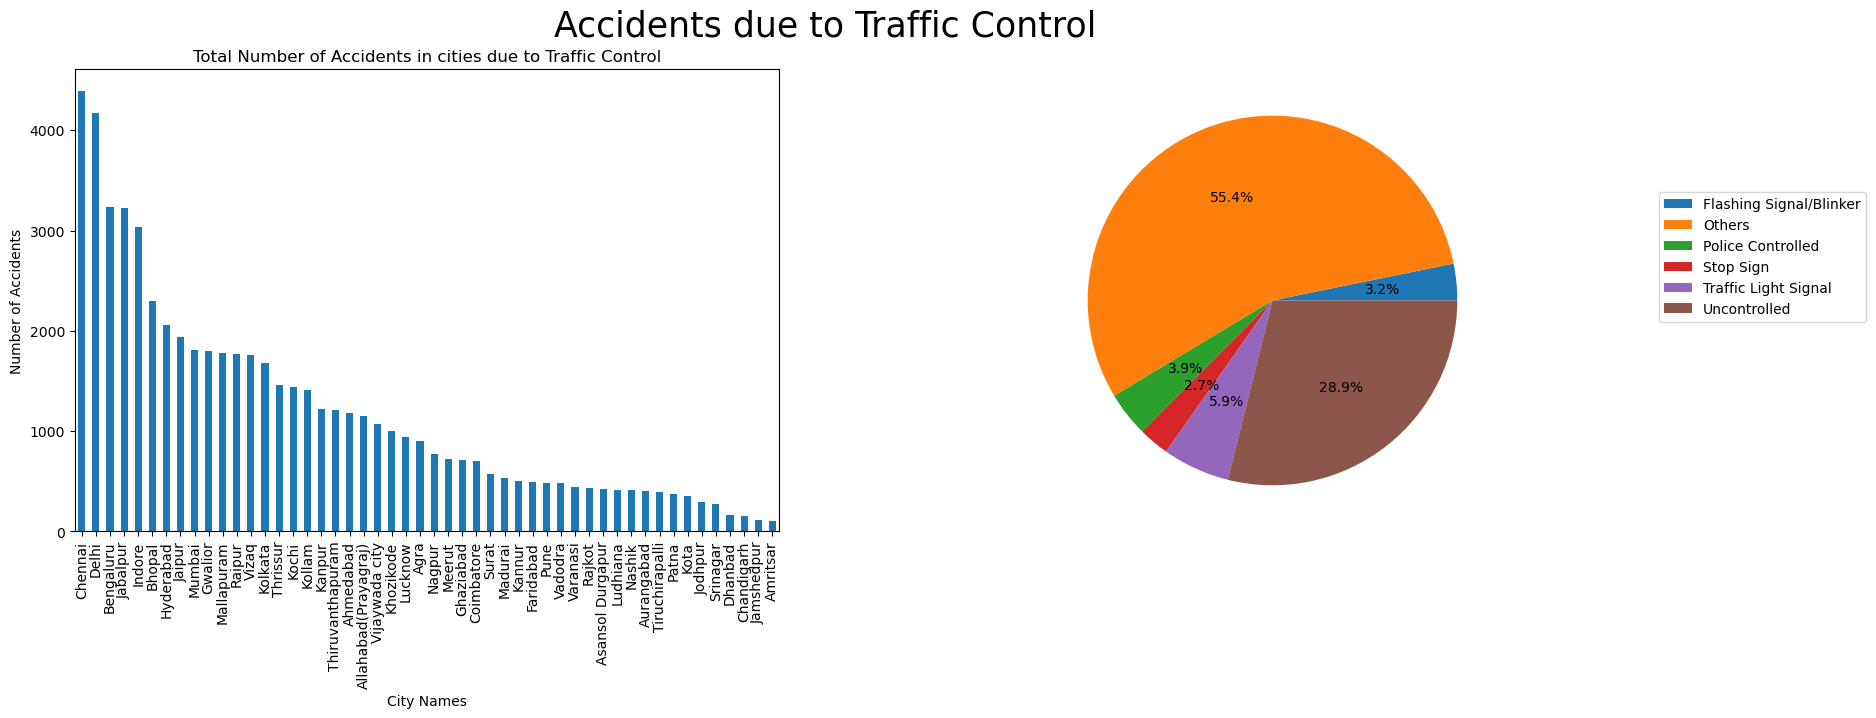

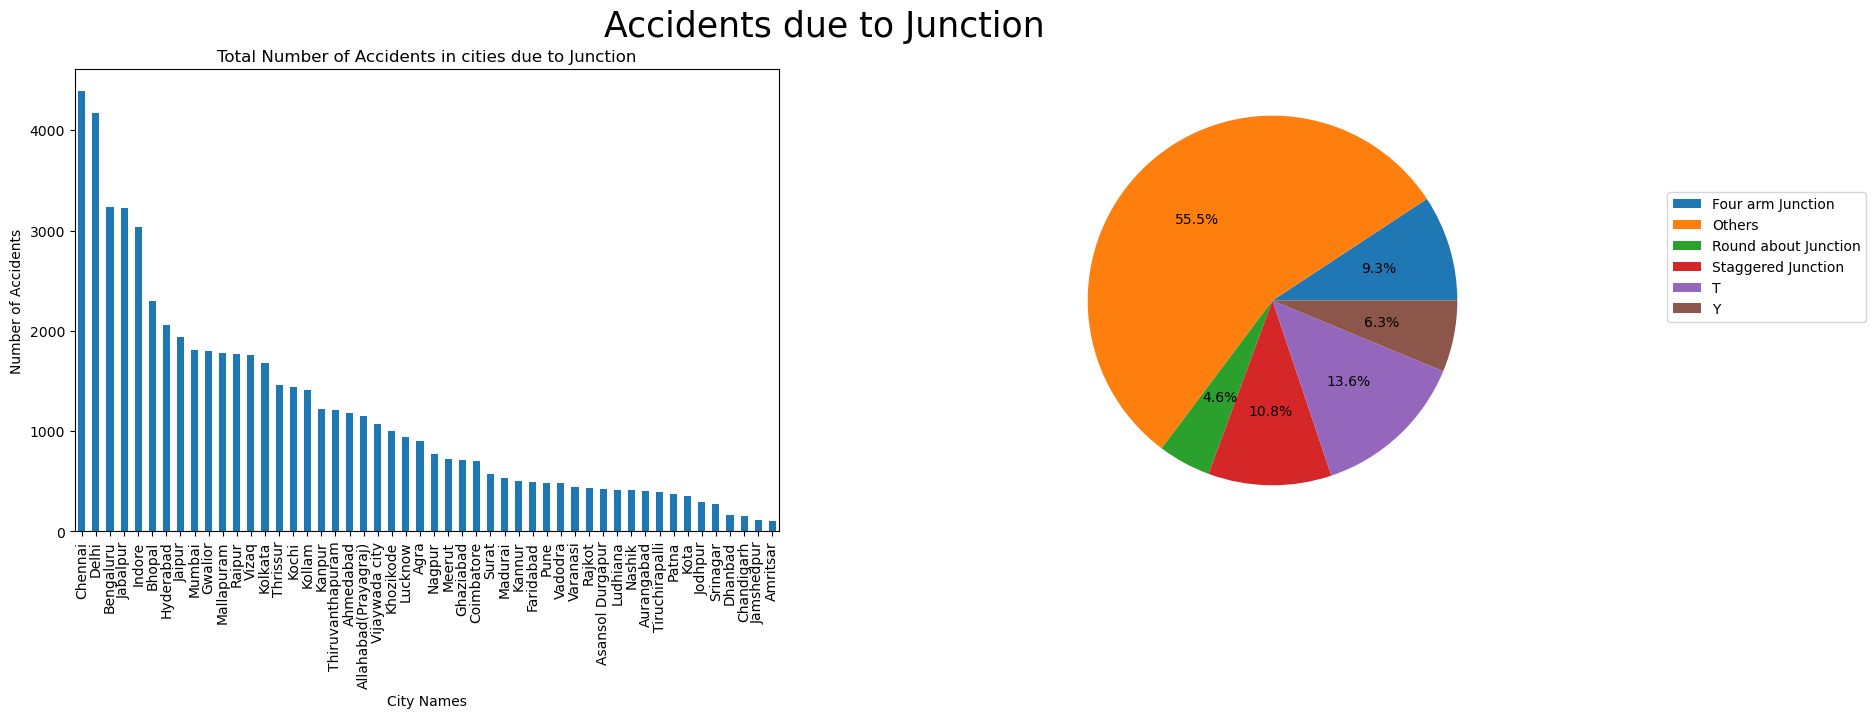

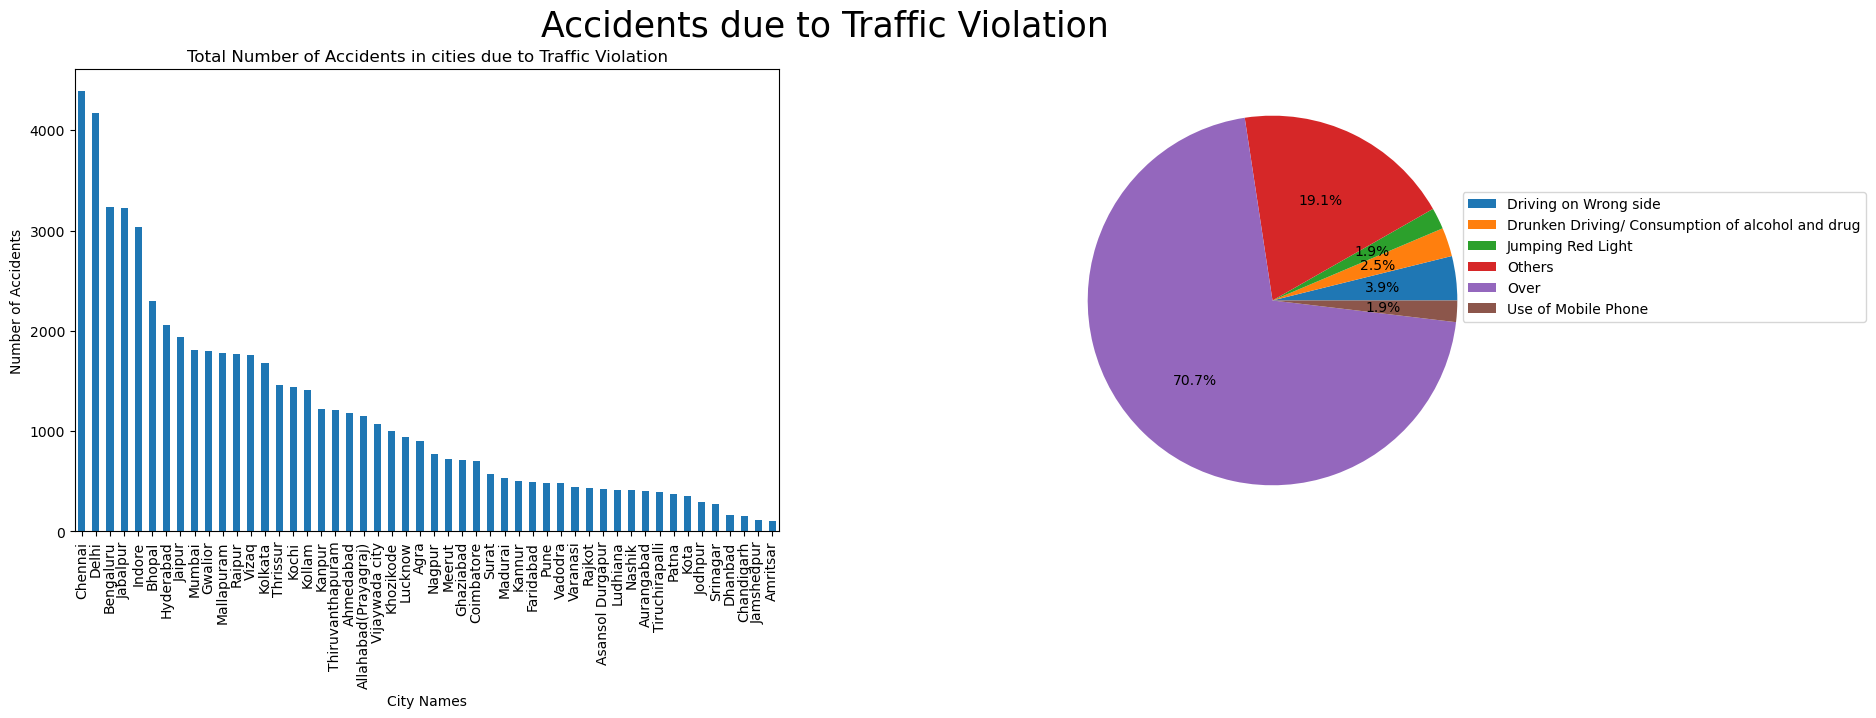

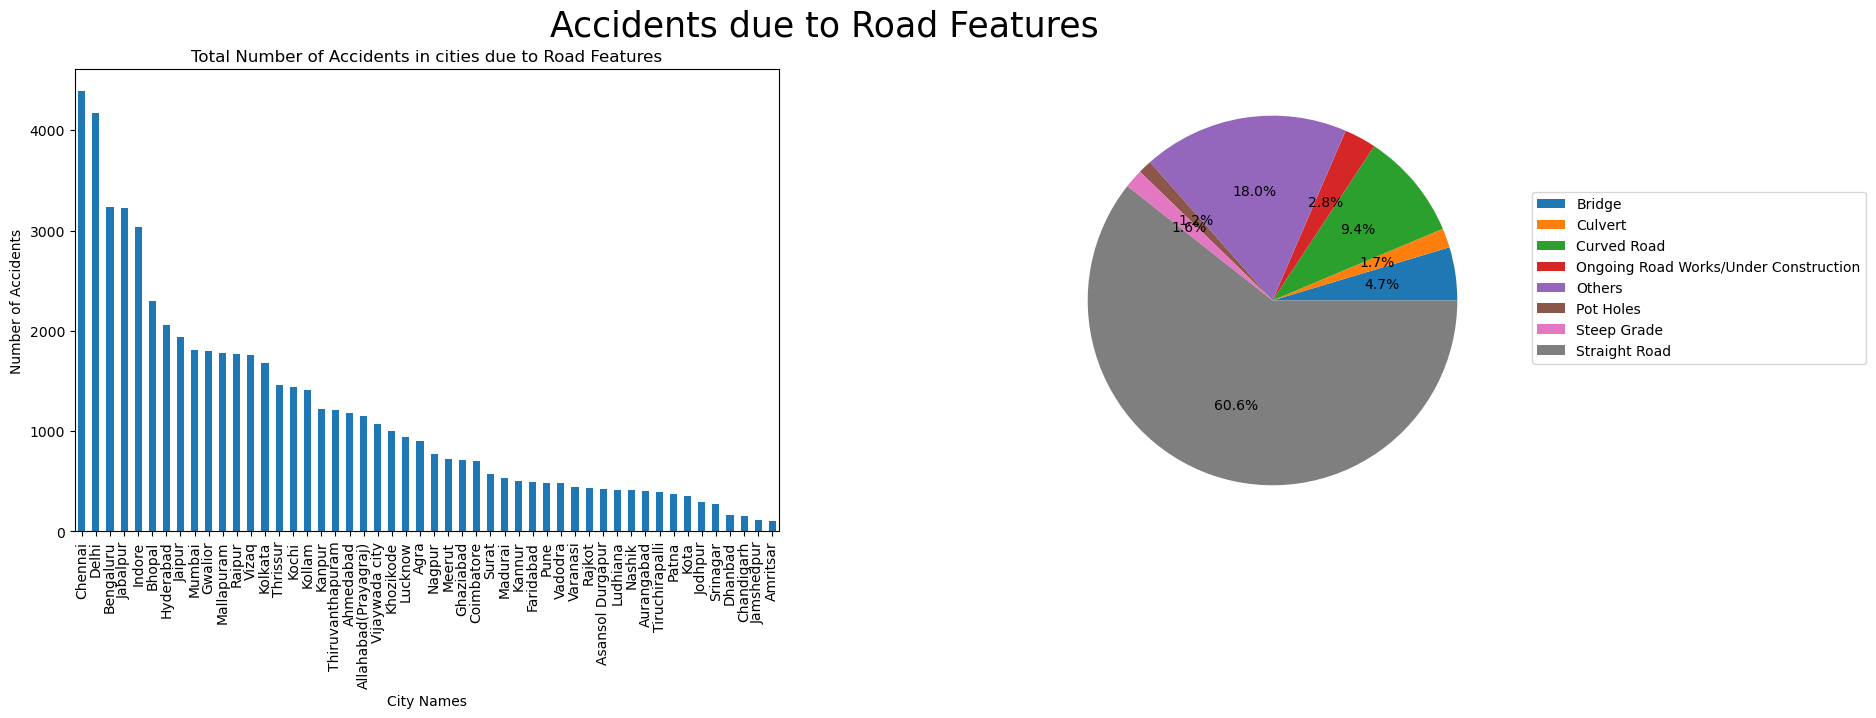

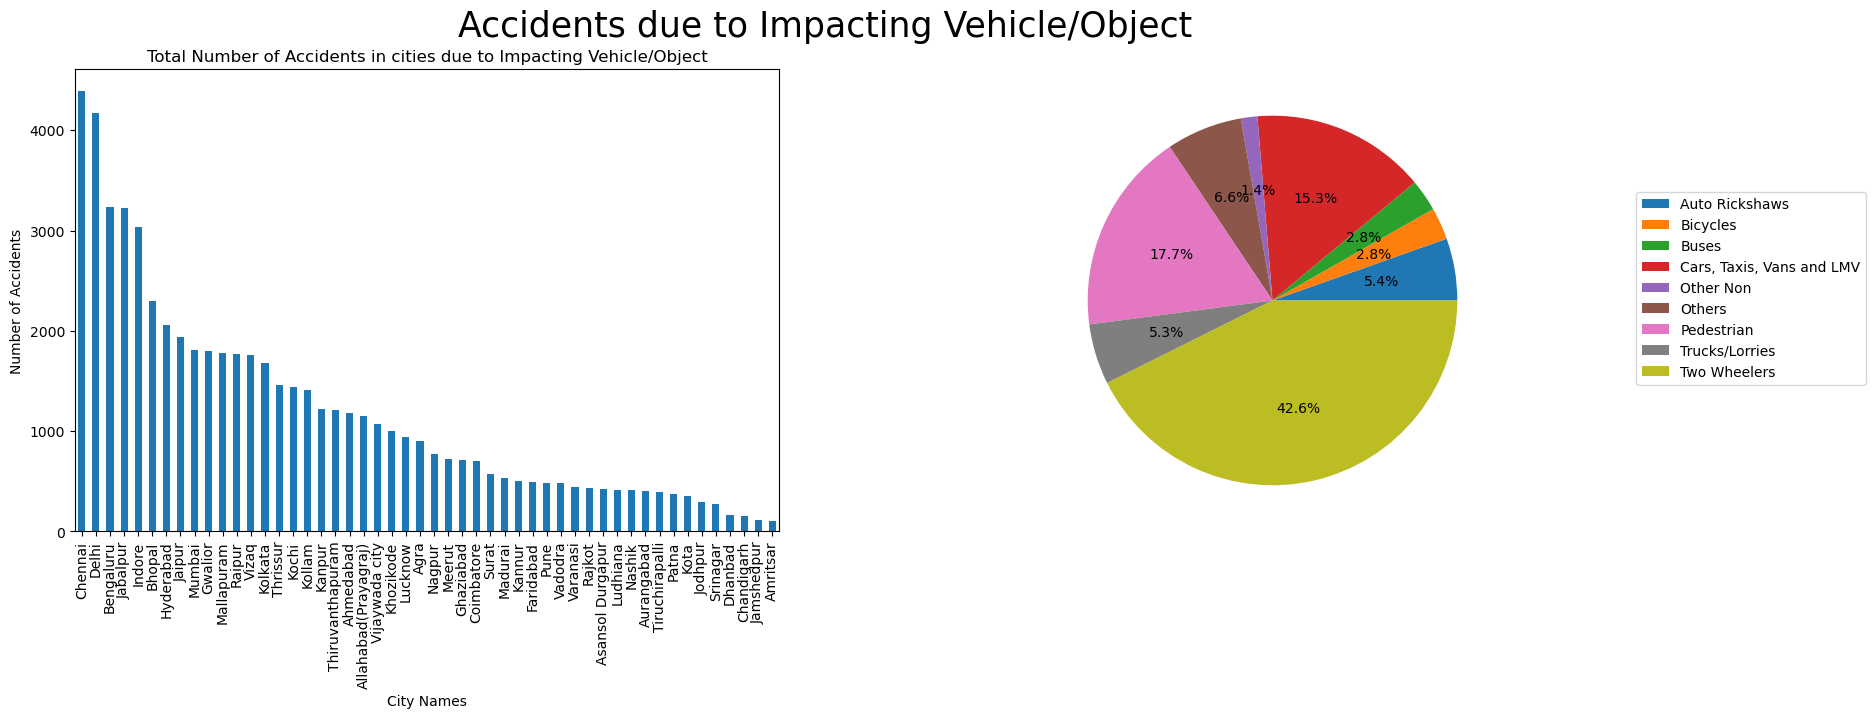

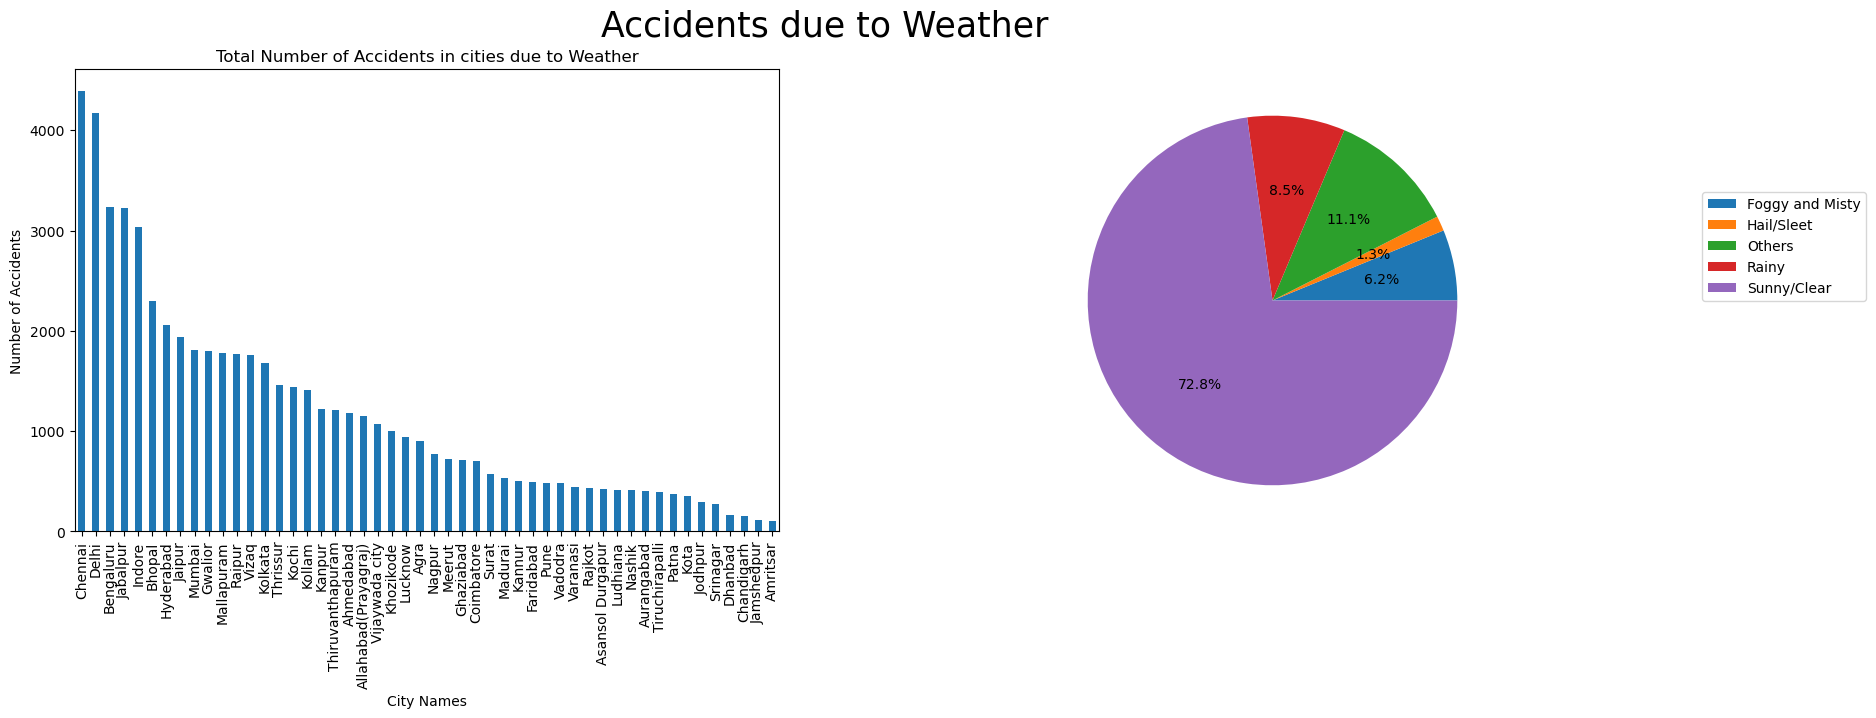

In [20]:
# Create a list of the unique cause categories for the outcome : 'Total number of Accidents'
accidents_cat_labels = total_accidents_mask['cause_category'].unique()

plt.figure(figsize=(50, 20))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

# For each cause category create plots
for label in accidents_cat_labels:
    # Create a figure for each cause category with 2 axes
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    # Add title to the main figure
    plt.suptitle("Accidents due to "+label, fontsize=25, horizontalalignment="center")
    
    # Create a mask to filter out the data for each cause category
    label_mask = total_accidents_mask[total_accidents_mask['cause_category']==label]
    
    # Group by the locations and create a bar chart based on each cause category 
    cat_accidents = label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)   
    cat_accidents.plot(kind='bar', legend=False, title="Total Number of Accidents in cities due to "+label, ax=axes[0], xlabel="City Names", ylabel="Number of Accidents")
    
    # Improve spacing of labels in the plotted bar chart
    plt.tick_params(pad=5, labelsize=6)
    
    # Group by related subcategories of the cause category and create a pie chart of the cause sub-category
    subcat_labels_grp = label_mask.groupby(['cause_subcategory']).agg('sum')[['count']]
    subcat_labels_grp.plot(kind='pie', subplots=True, ylabel='', labeldistance=None, ax=axes[1], autopct='%1.1f%%')
    
    # Adjust spacing of legend for the pie chart
    plt.legend(bbox_to_anchor=(1.8, .75), loc="upper right")
    
    plt.show()

## List of cause sub-categories with top 3 cities

In [21]:
accidents_cause_city_df = pd.DataFrame(columns = ['cause_sub_category', 'top_cities'])

for label in accidents_subcat_labels:
    label_mask = total_accidents_mask[total_accidents_mask['cause_subcategory']==label]
    
    subcat_label_mask = total_accidents_mask[total_accidents_mask['cause_subcategory']==label]
    subcat_accidents = subcat_label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)
    # top 3 cities in subcategory
    top_3_cities = subcat_accidents.head(3).reset_index()[['million_plus_cities']]
    accidents_cause_city_row = top_3_cities.apply(", ".join)

    data = pd.DataFrame({
            'cause_sub_category' : [label],
            'top_cities' : accidents_cause_city_row['million_plus_cities']
    })
    accidents_cause_city_df = pd.concat([accidents_cause_city_df, data])

accidents_cause_city_df

cause_sub_category  \
0                           Flashing Signal/Blinker   
0                                            Others   
0                                 Police Controlled   
0                                         Stop Sign   
0                              Traffic Light Signal   
0                                      Uncontrolled   
0                                 Four arm Junction   
0                              Round about Junction   
0                                Staggered Junction   
0                                                 T   
0                                                 Y   
0                             Driving on Wrong side   
0  Drunken Driving/ Consumption of alcohol and drug   
0                                 Jumping Red Light   
0                                              Over   
0                               Use of Mobile Phone   
0                                            Bridge   
0                                           Culvert   
0                                       Curved Road   
0             Ongoing Road Works/Under Construction   
0                                         Pot Holes   
0                                       Steep Grade   
0                                     Straight Road   
0                                    Auto Rickshaws   
0                                          Bicycles   
0                                             Buses   
0                         Cars, Taxis, Vans and LMV   
0                                         Other Non   
0                                        Pedestrian   
0                                    Trucks/Lorries   
0                                      Two Wheelers   
0                                   Foggy and Misty   
0                                        Hail/Sleet   
0                                             Rainy   
0                                       Sunny/Clear   

                                top_cities  
0     Chennai, Delhi, Allahabad(Prayagraj)  
0                 Delhi, Jabalpur, Chennai  
0                Chennai, Kochi, Bengaluru  
0                   Bhopal, Chennai, Delhi  
0                Chennai, Delhi, Bengaluru  
0              Mumbai, Hyderabad, Jabalpur  
0               Indore, Chennai, Bengaluru  
0               Chennai, Hyderabad, Indore  
0               Mumbai, Hyderabad, Chennai  
0                  Jabalpur, Indore, Delhi  
0                Chennai, Indore, Jabalpur  
0     Delhi, Chennai, Allahabad(Prayagraj)  
0  Chennai, Allahabad(Prayagraj), Jabalpur  
0     Chennai, Delhi, Allahabad(Prayagraj)  
0               Indore, Bengaluru, Chennai  
0    Chennai, Kanpur, Allahabad(Prayagraj)  
0     Chennai, Delhi, Allahabad(Prayagraj)  
0    Chennai, Indore, Allahabad(Prayagraj)  
0                  Chennai, Delhi, Gwalior  
0    Kanpur, Chennai, Allahabad(Prayagraj)  
0   Allahabad(Prayagraj), Chennai, Lucknow  
0    Chennai, Indore, Allahabad(Prayagraj)  
0                 Bengaluru, Delhi, Indore  
0            Chennai, Jabalpur, Mallapuram  
0                 Chennai, Delhi, Ludhiana  
0   Chennai, Gwalior, Allahabad(Prayagraj)  
0            Mallapuram, Jabalpur, Chennai  
0                    Kanpur, Chennai, Agra  
0                    Delhi, Mumbai, Indore  
0                 Kanpur, Jabalpur, Jaipur  
0               Jabalpur, Bengaluru, Delhi  
0                 Chennai, Kanpur, Lucknow  
0    Allahabad(Prayagraj), Rajkot, Lucknow  
0                   Chennai, Raipur, Delhi  
0                 Bengaluru, Indore, Delhi

## Bar chart for each SubCategory across Cities

<Figure size 3000x1200 with 0 Axes>

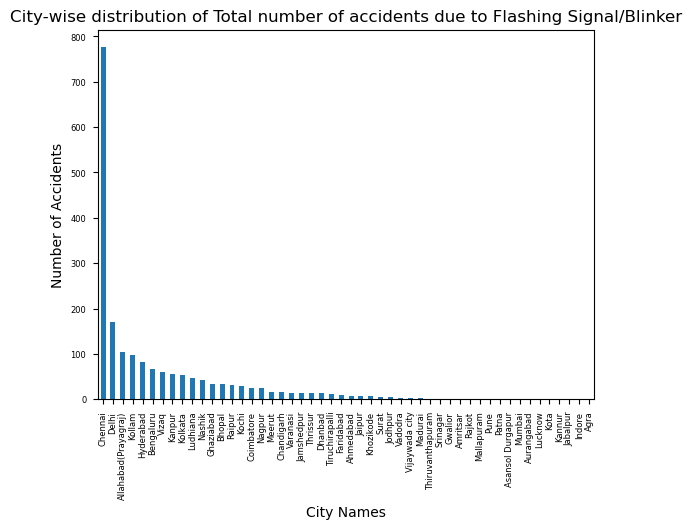

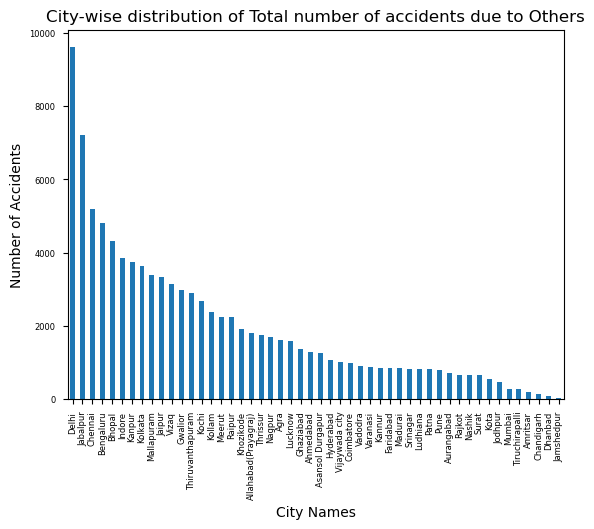

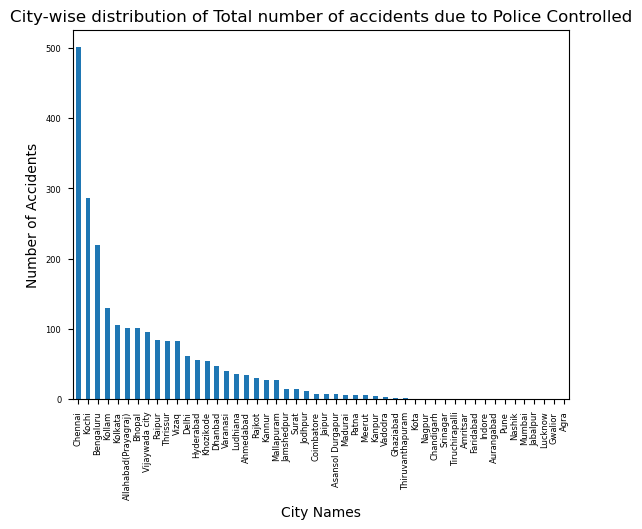

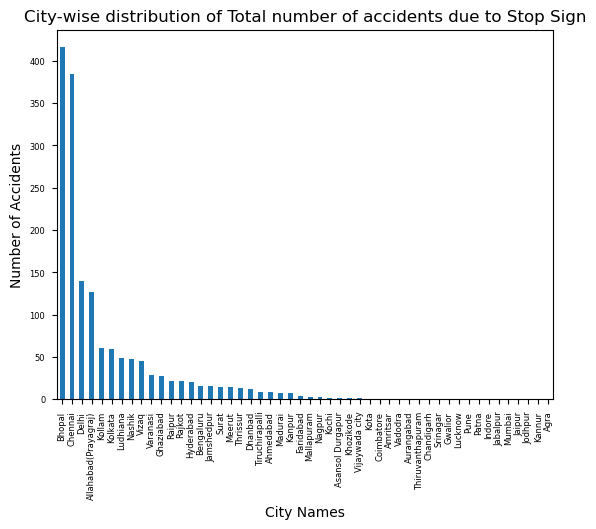

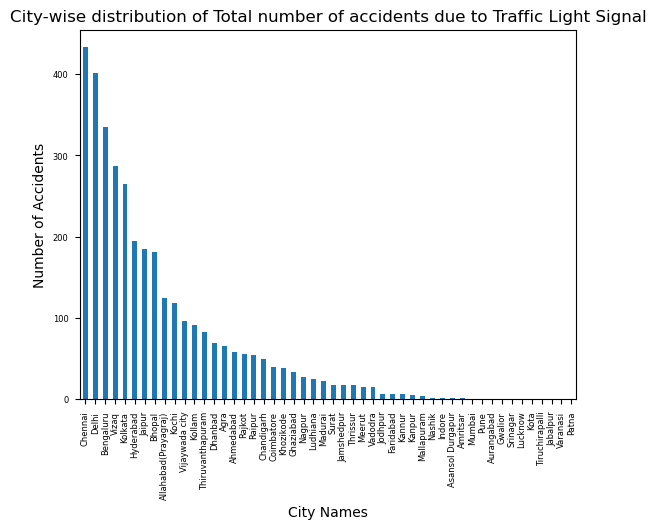

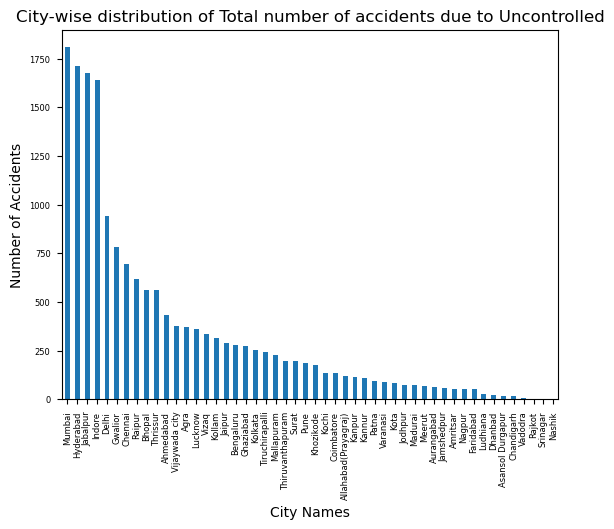

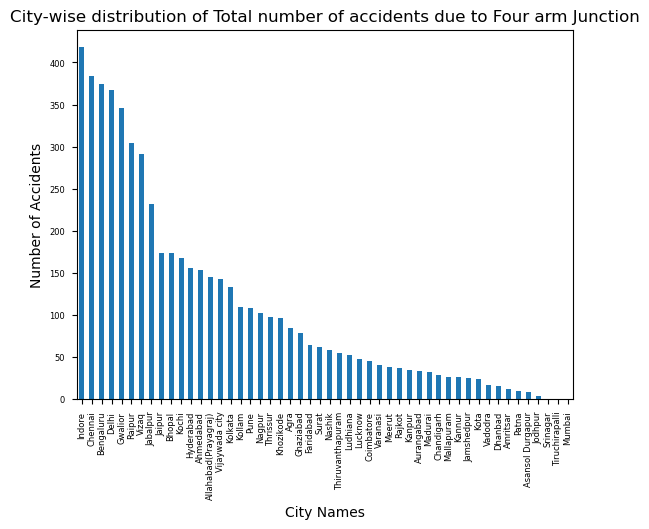

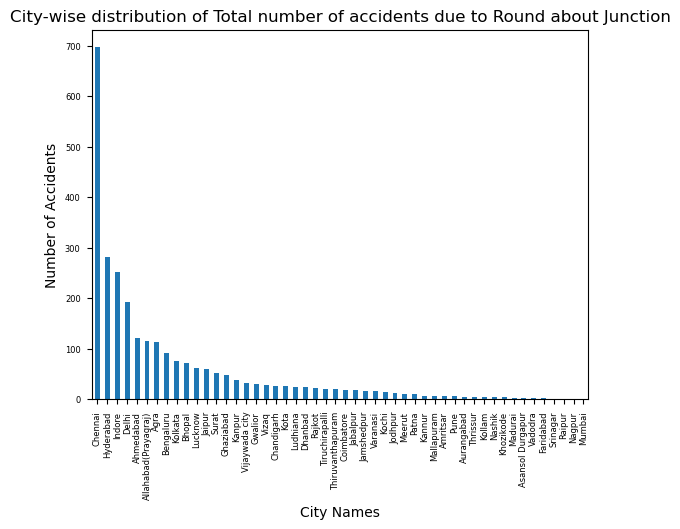

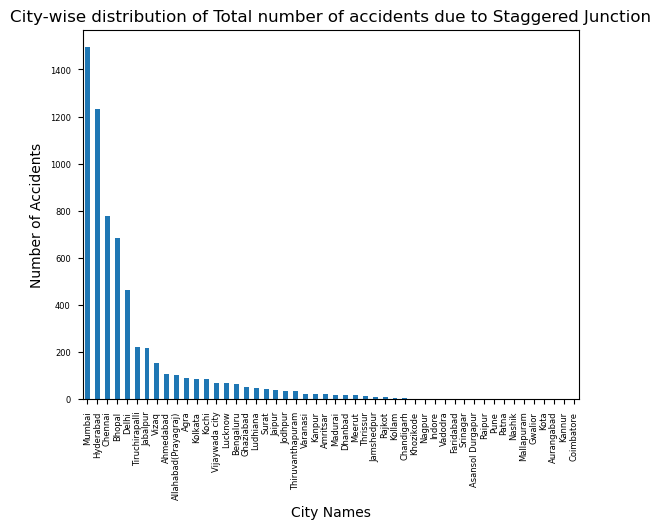

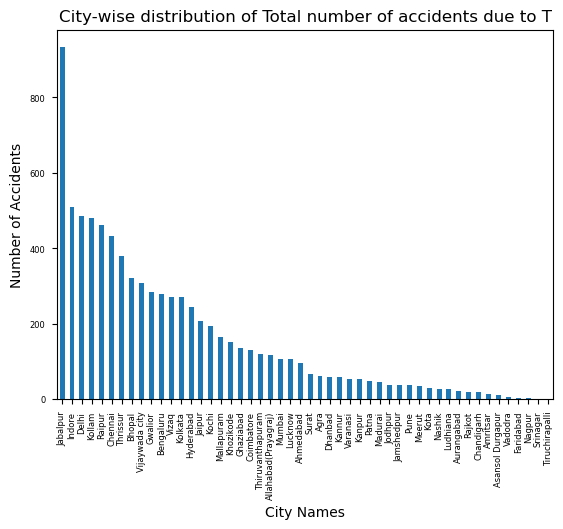

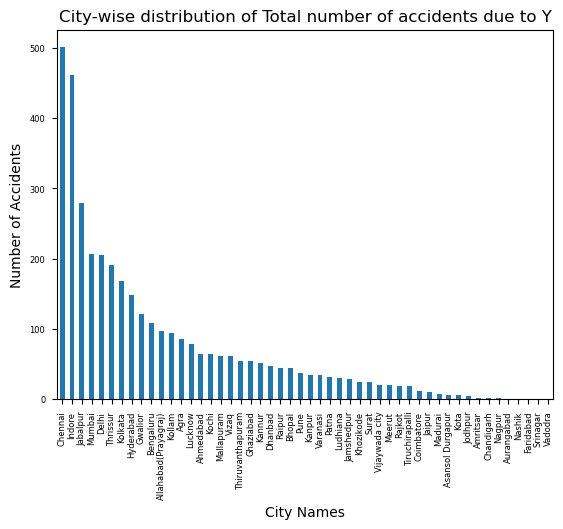

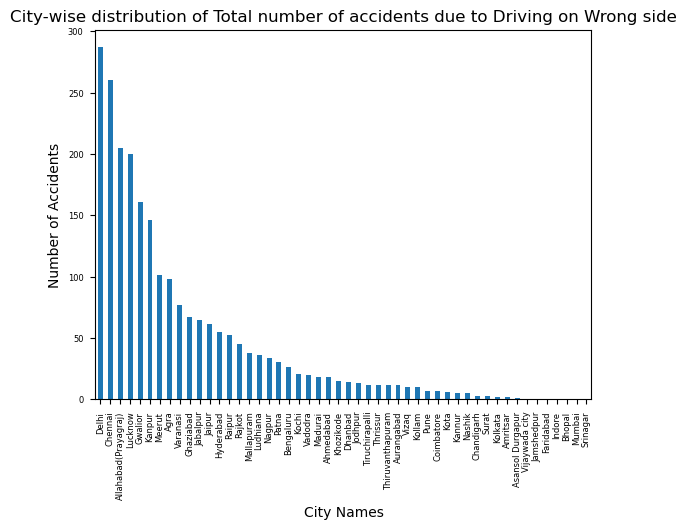

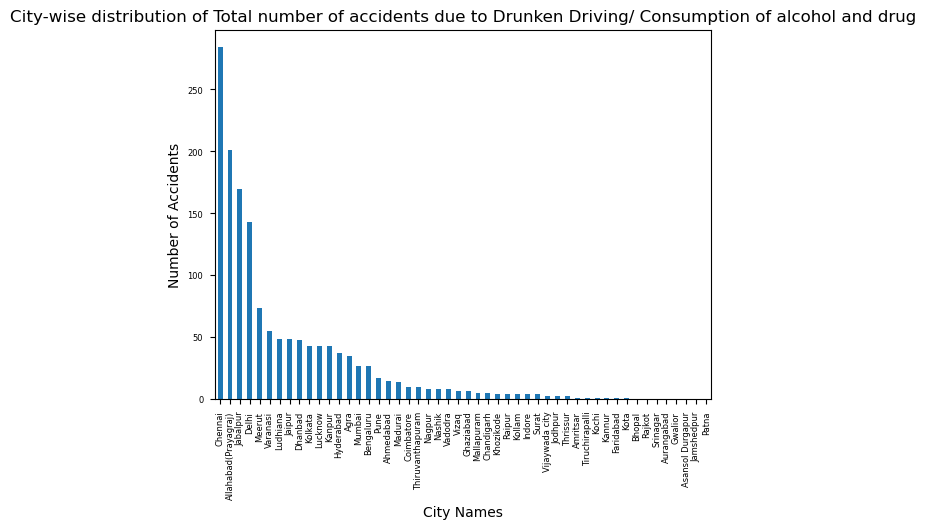

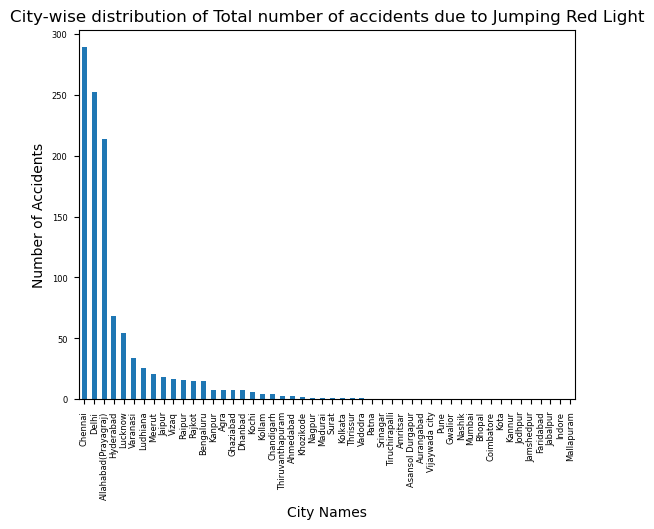

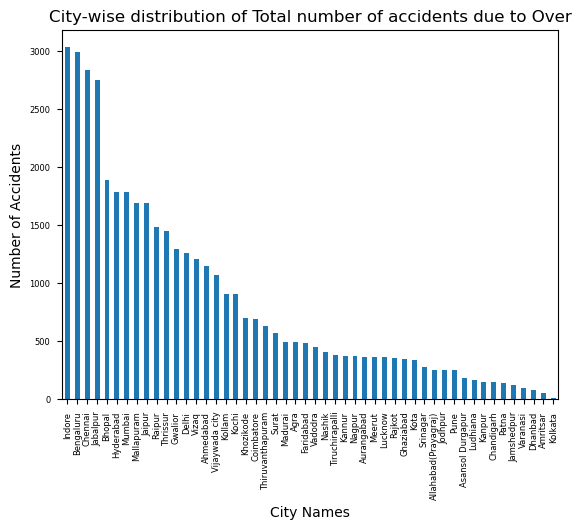

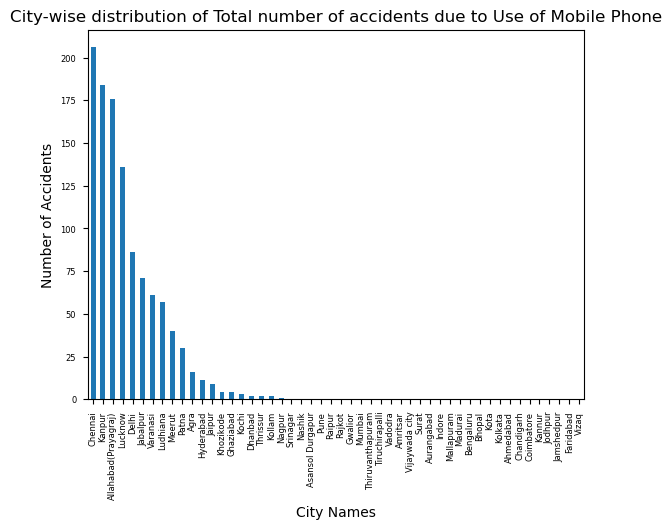

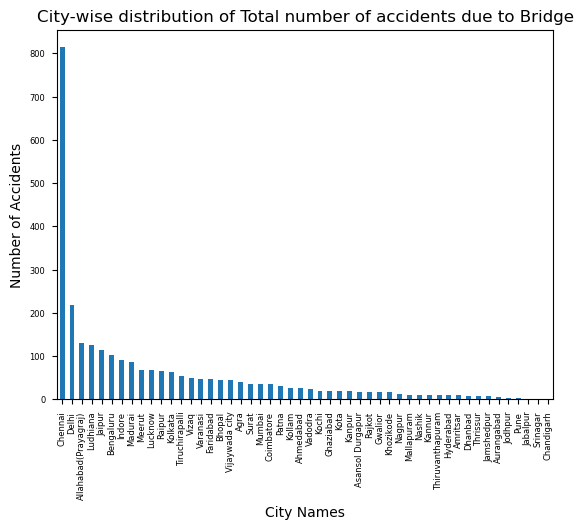

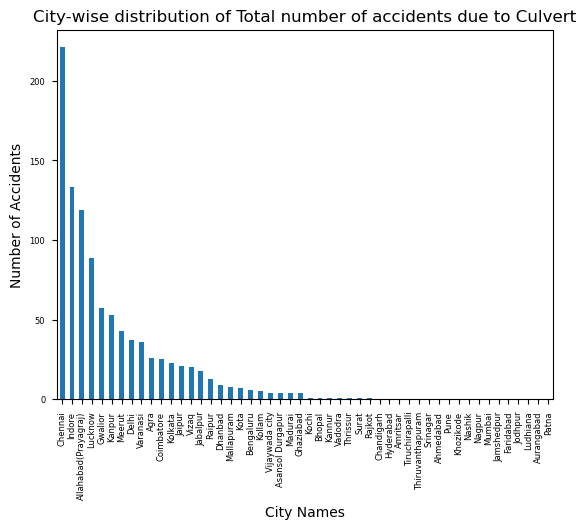

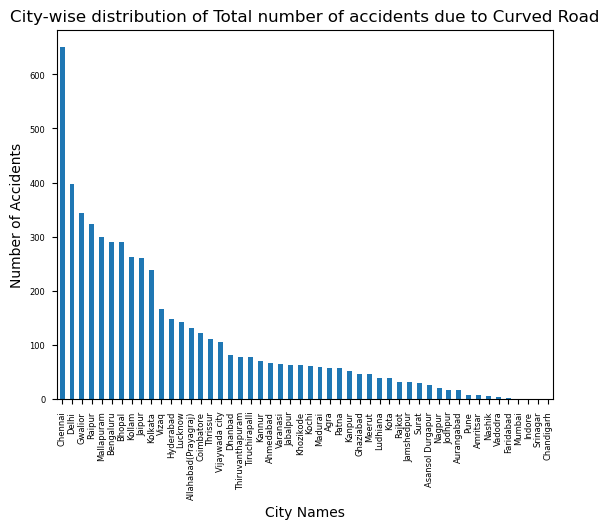

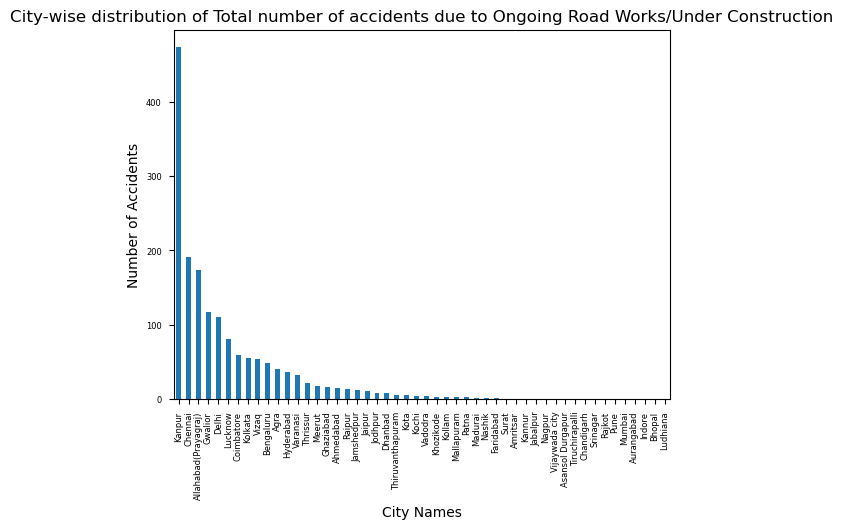

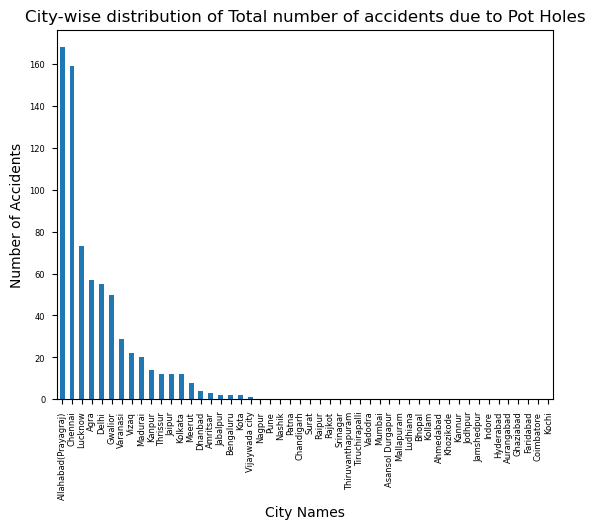

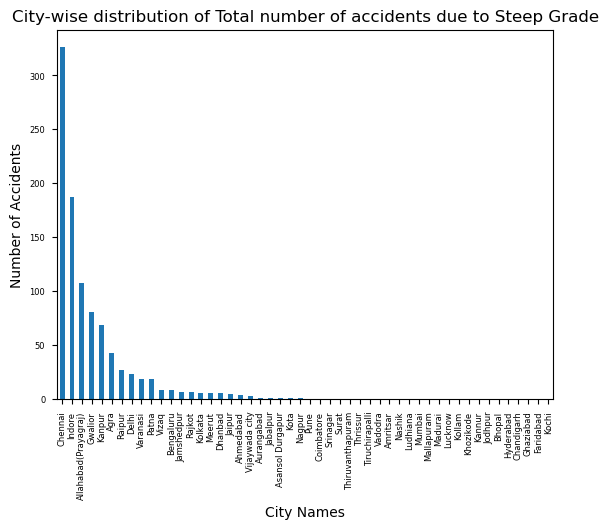

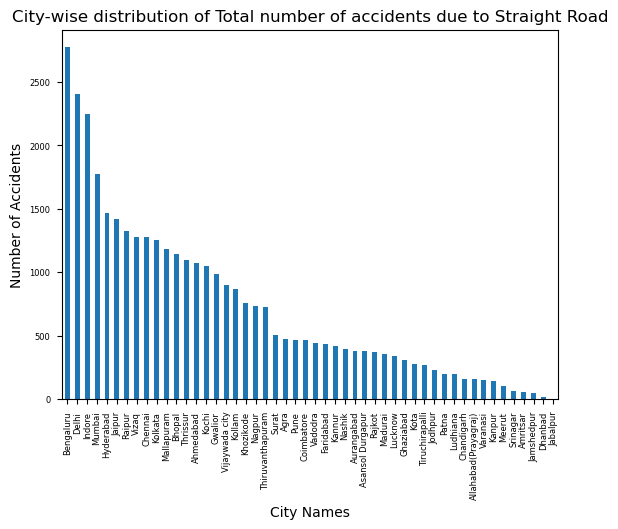

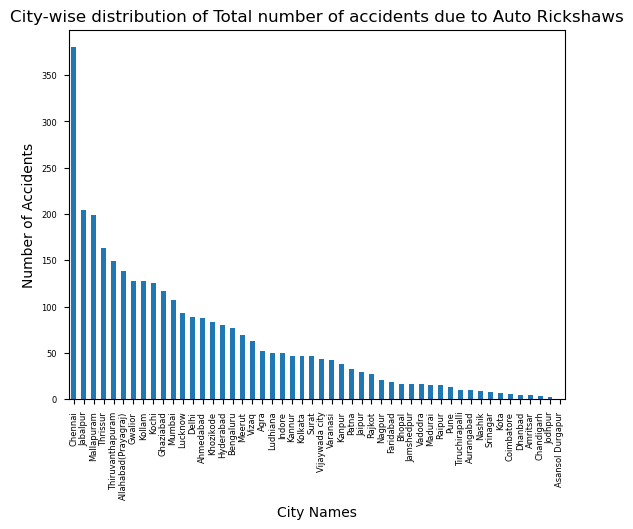

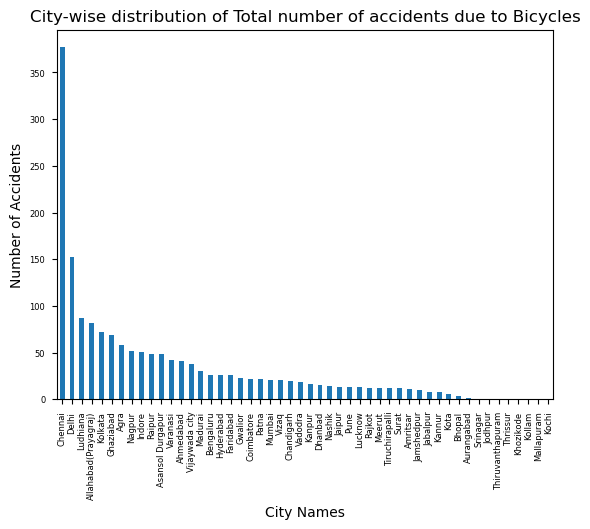

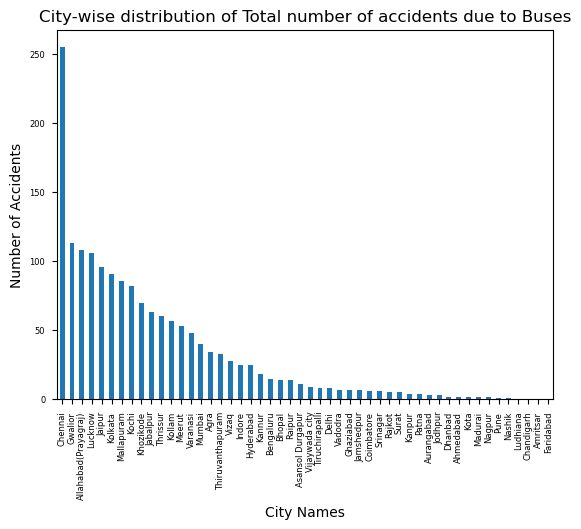

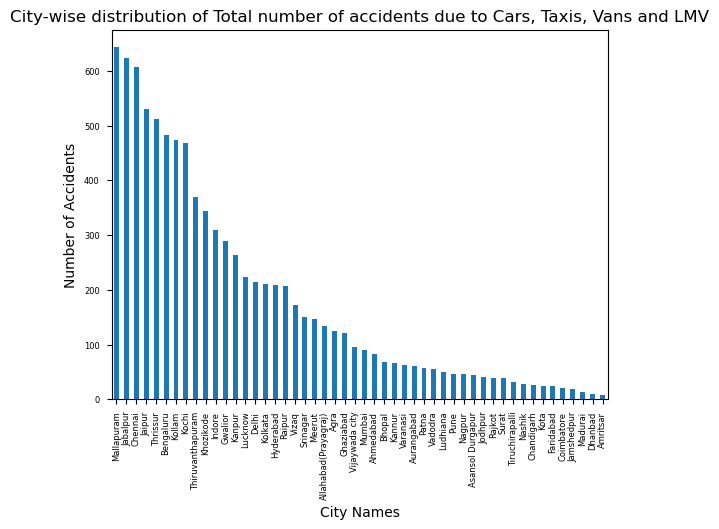

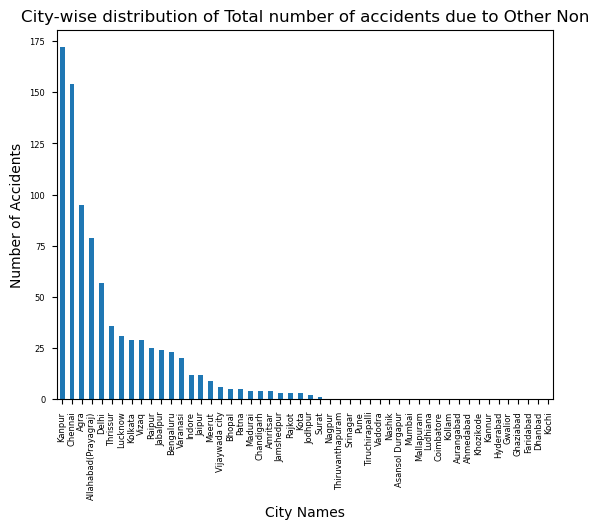

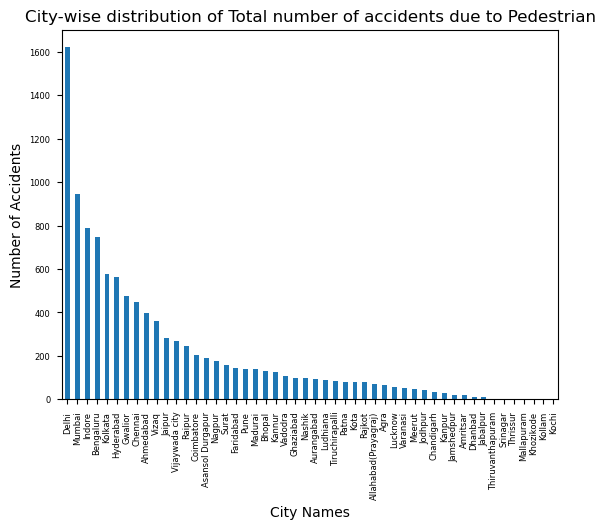

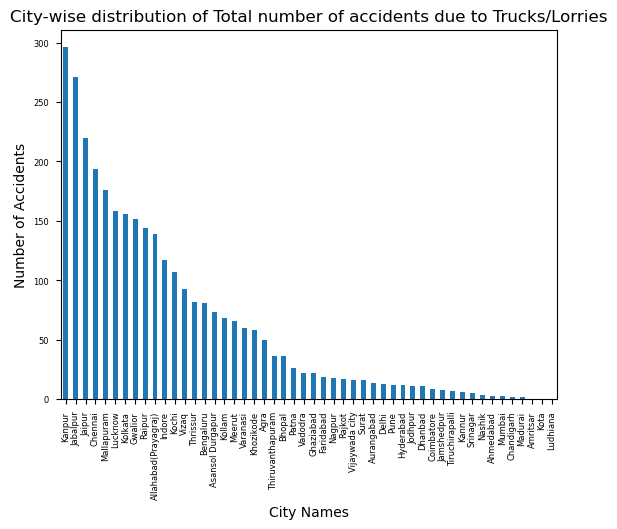

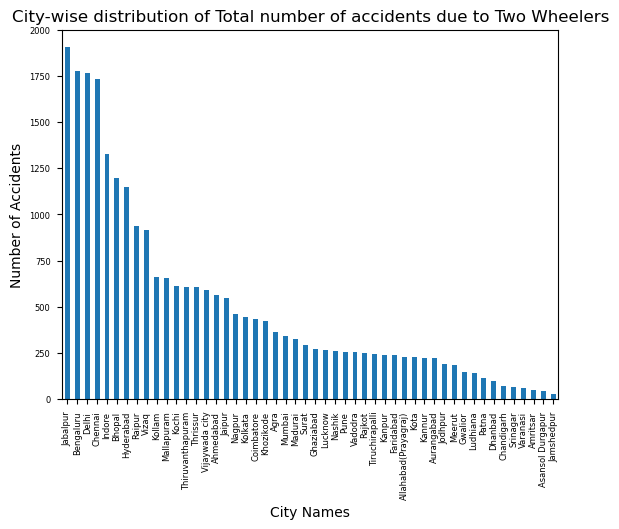

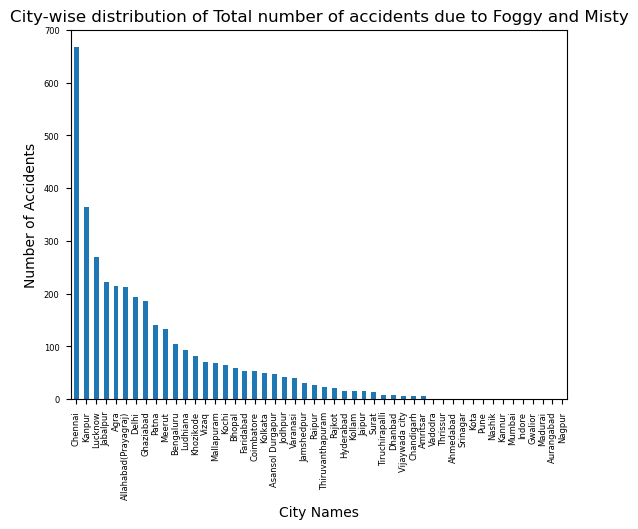

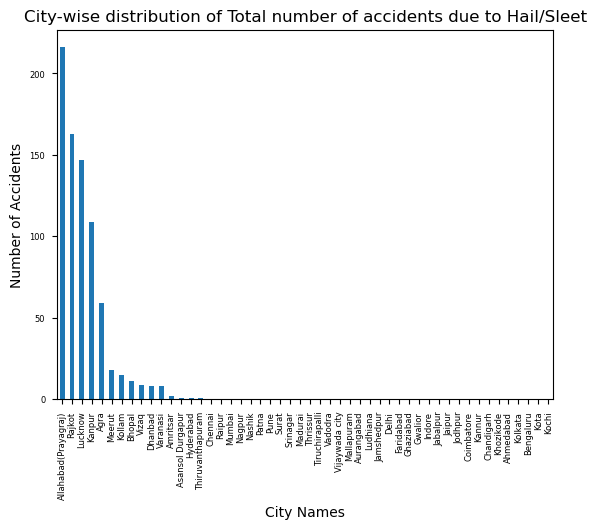

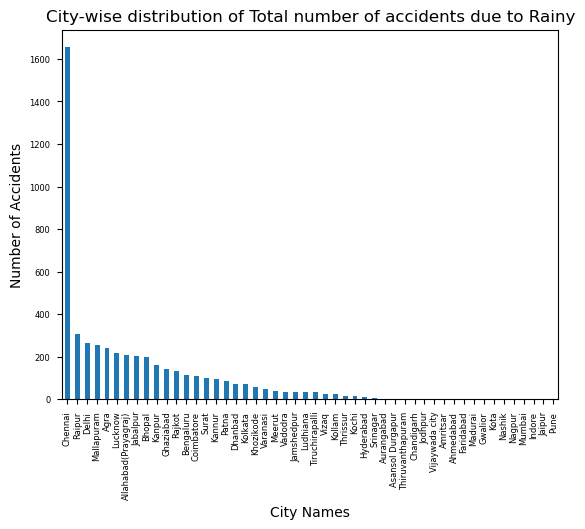

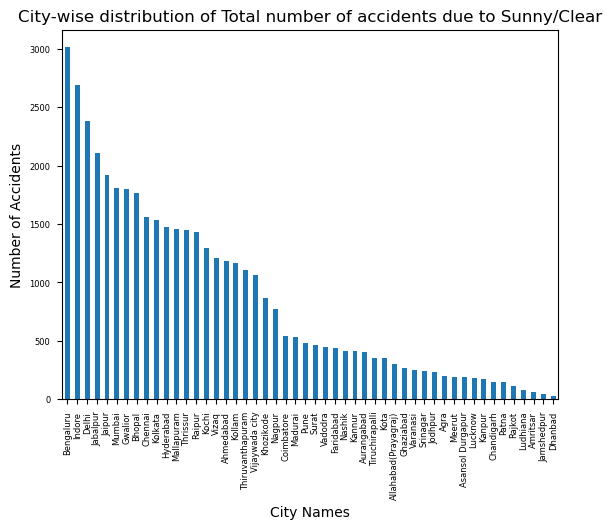

In [22]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for label in accidents_subcat_labels:
    
    # Create a mask to filter out the data for each cause subcategory
    label_mask = total_accidents_mask[total_accidents_mask['cause_subcategory']==label]
    
    subcat_label_mask = total_accidents_mask[total_accidents_mask['cause_subcategory']==label]
    subcat_accidents = subcat_label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)
    
    subcat_accidents.plot(kind='bar', title="City-wise distribution of Total number of accidents due to "+ label, xlabel="City Names", ylabel="Number of Accidents", legend=False)

    plt.tick_params(pad=5, labelsize=6)
    plt.show()

# Analysis : Total Injured

In [23]:
# Create a Mask with outcome of Incident : "Total Injured"
total_injured_mask = df[df['outcome_of_incident']=="Total Injured"]

## Bar Chart distribution of total injured in accidents across cities

<Figure size 5000x1500 with 0 Axes>

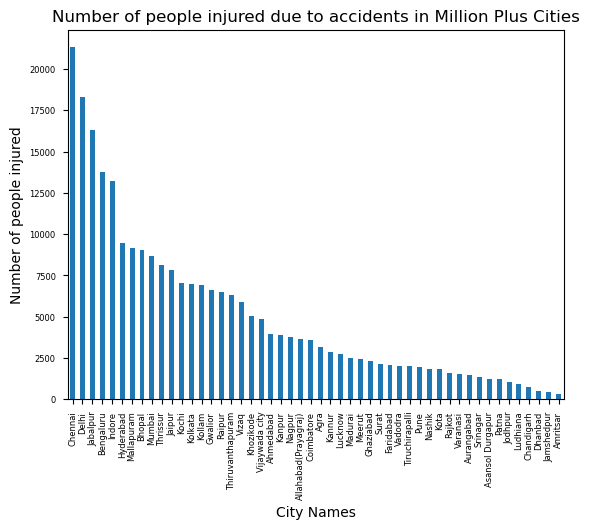

In [24]:
plt.figure(figsize=(50, 15))

# Group by cities w.r.t outcome : 'Total  Injured'
cat_grp_injured = total_injured_mask.groupby(['million_plus_cities']).agg('sum')[['count']]\
    .sort_values(by='count', ascending=False)

# Create a Barplot of Total Injured w.r.t cities
cat_grp_injured.plot(kind="bar", title="Number of people injured due to accidents in Million Plus Cities", legend=False, xlabel="City Names", ylabel="Number of people injured")

plt.tick_params(pad=5, labelsize=6)
plt.show()

## Percentage distribution of total injured in accidents across cities

In [25]:
cat_grp_injured['percent'] = cat_grp_injured.transform(lambda x: (x/x.sum()) * 100)
cat_grp_injured

count   percent
million_plus_cities                    
Chennai               21315.0  8.439078
Delhi                 18310.0  7.249332
Jabalpur              16285.0  6.447590
Bengaluru             13755.0  5.445907
Indore                13240.0  5.242007
Hyderabad              9460.0  3.745422
Mallapuram             9140.0  3.618727
Bhopal                 9035.0  3.577155
Mumbai                 8700.0  3.444521
Thrissur               8160.0  3.230724
Jaipur                 7840.0  3.104029
Kochi                  7030.0  2.783332
Kolkata                7005.0  2.773434
Kollam                 6905.0  2.733841
Gwalior                6645.0  2.630902
Raipur                 6470.0  2.561615
Thiruvanthapuram       6315.0  2.500247
Vizaq                  5910.0  2.339899
Khozikode              5060.0  2.003365
Vijaywada city         4885.0  1.934079
Ahmedabad              3930.0  1.555973
Kanpur                 3890.0  1.540137
Nagpur                 3760.0  1.488667
Allahabad(Prayagraj)   3660.0  1.449075
Coimbatore             3610.0  1.429278
Agra                   3165.0  1.253093
Kannur                 2865.0  1.134317
Lucknow                2770.0  1.096704
Madurai                2495.0  0.987825
Meerut                 2435.0  0.964070
Ghaziabad              2325.0  0.920519
Surat                  2115.0  0.837375
Faridabad              2105.0  0.833416
Vadodra                2040.0  0.807681
Tiruchirapalli         2005.0  0.793824
Pune                   1940.0  0.768089
Nashik                 1825.0  0.722558
Kota                   1810.0  0.716619
Rajkot                 1620.0  0.641394
Varanasi               1525.0  0.603781
Aurangabad             1465.0  0.580026
Srinagar               1375.0  0.544393
Asansol Durgapur       1230.0  0.486984
Patna                  1215.0  0.481045
Jodhpur                1035.0  0.409779
Ludhiana                920.0  0.364248
Chandigarh              740.0  0.292982
Dhanbad                 490.0  0.194002
Jamshedpur              455.0  0.180145
Amritsar                295.0  0.116797

## Study w.r.t each Cause Category and Sub-category

In [26]:
injured_subcat_labels = total_injured_mask['cause_subcategory'].unique()

<Figure size 5000x2000 with 0 Axes>

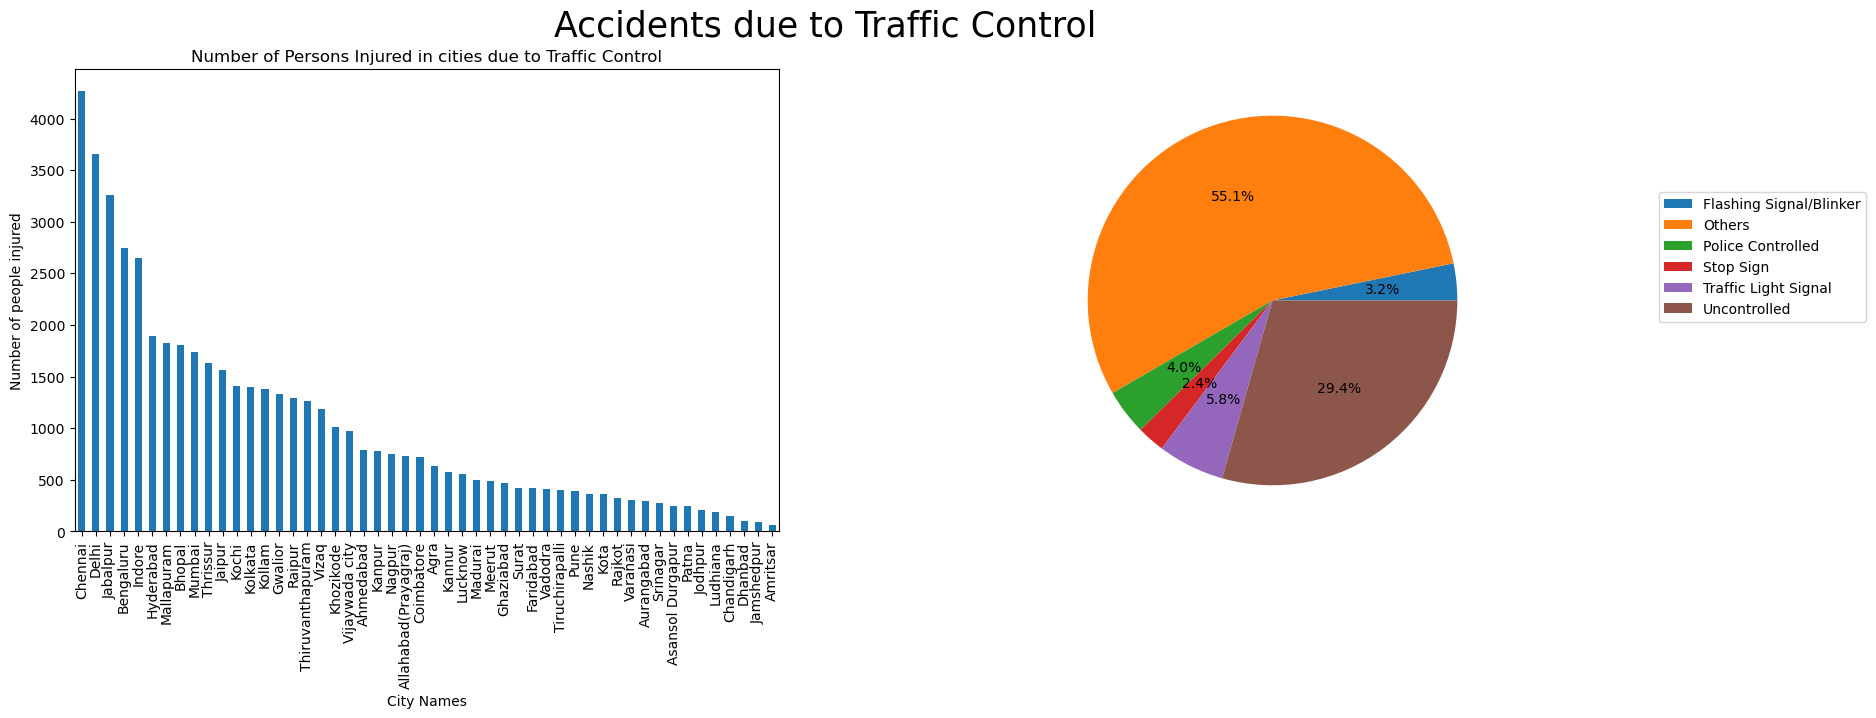

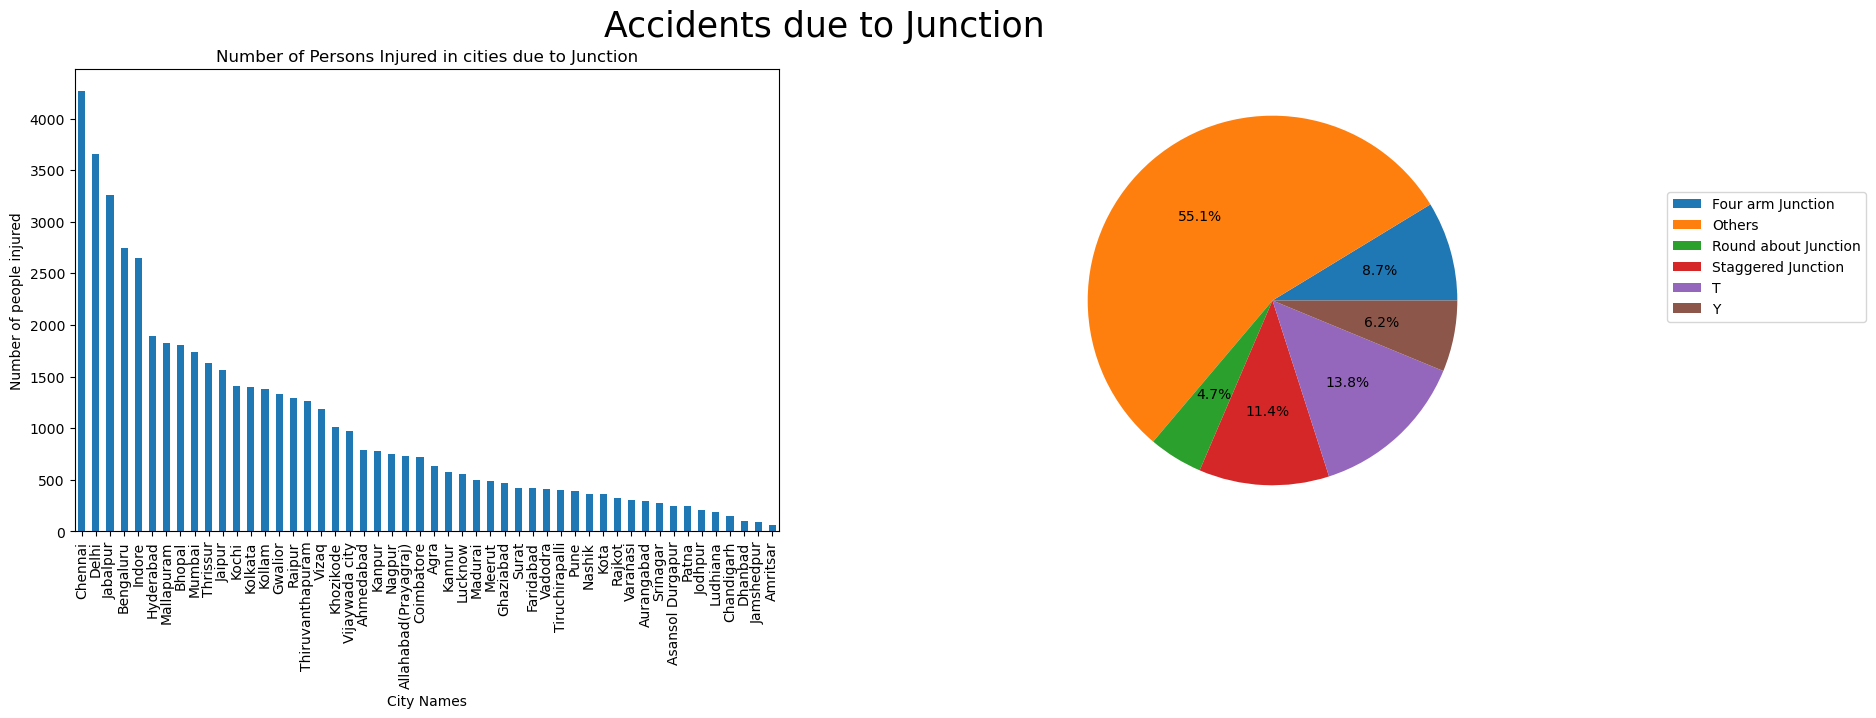

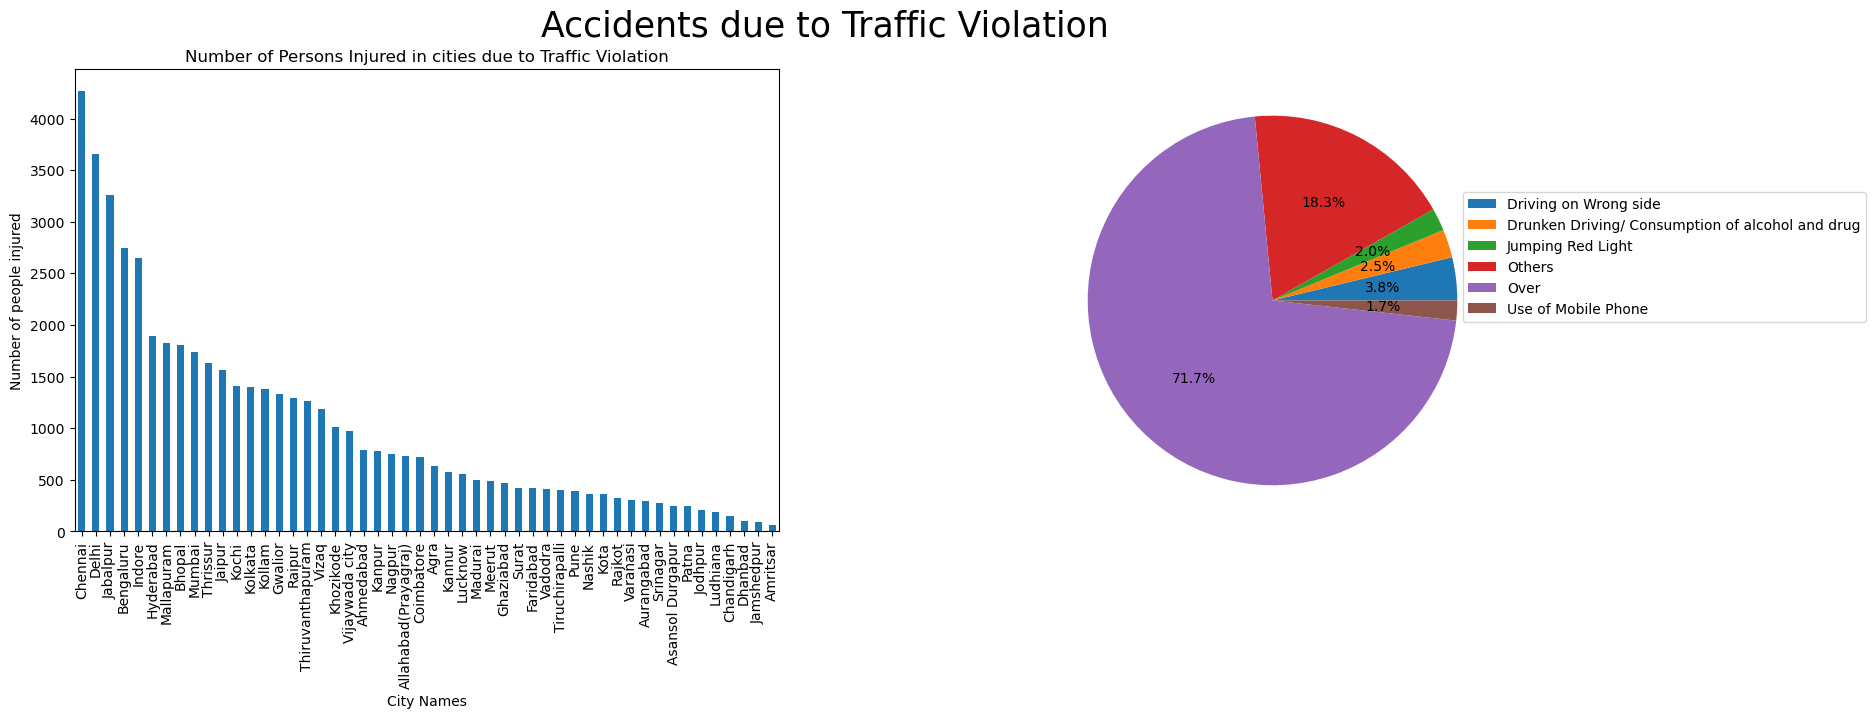

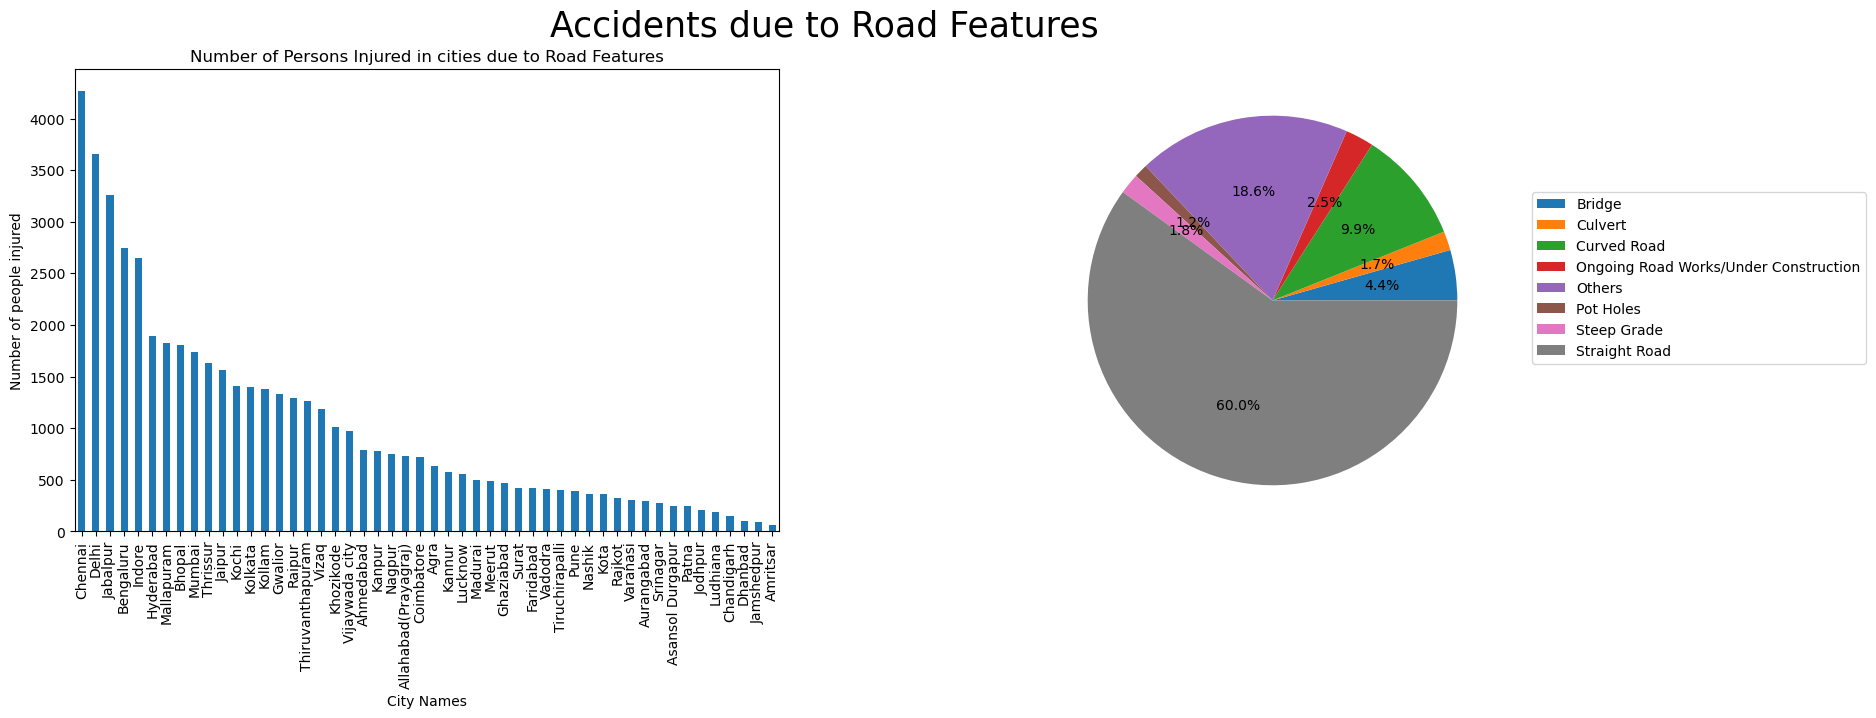

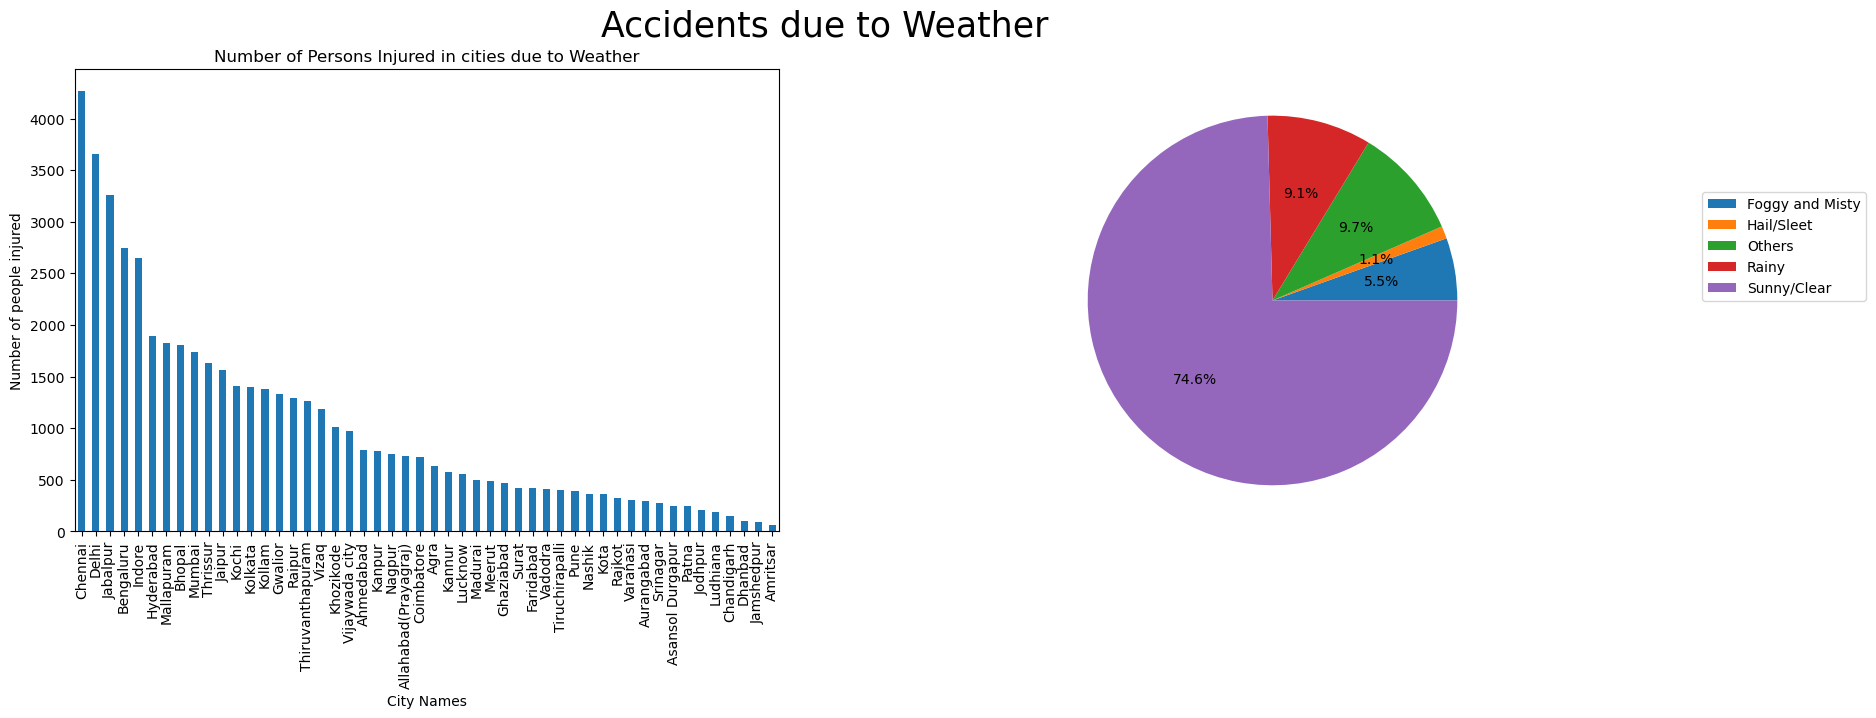

In [27]:
# Create a list of the unique cause categories for the outcome : 'Total Injured'
injured_cat_labels = total_injured_mask['cause_category'].unique()

plt.figure(figsize=(50, 20))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

# For each cause category create plots
for label in injured_cat_labels:
    # Create a figure for each cause category with 2 axes
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    # Add title to the main figure
    plt.suptitle("Accidents due to "+label, fontsize=25, horizontalalignment='center')
    
    # Create a mask to filter out the data for each cause category
    label_mask = total_injured_mask[total_injured_mask['cause_category']==label]
    
    # Group by the locations and create a bar chart based on each cause category 
    cat_injured = label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)   
    cat_injured.plot(kind='bar', title="Number of Persons Injured in cities due to "+label, ax=axes[0], legend=False, xlabel="City Names", ylabel="Number of people injured")
    
    # Improve spacing of labels in the plotted bar chart
    plt.tick_params(pad=5, labelsize=6)
    
    # Group by related subcategories of the cause category and create a pie chart of the cause sub-category
    subcat_labels_grp = label_mask.groupby(['cause_subcategory']).agg('sum')[['count']]
    subcat_labels_grp.plot(kind='pie', subplots=True, ylabel='', labeldistance=None, ax=axes[1], autopct='%1.1f%%')
    
    # Adjust spacing of legend for the pie chart
    plt.legend(bbox_to_anchor=(1.8, .75), loc="upper right")
    
    plt.show()

## List of cause sub-categories with top 3 cities

In [28]:
injured_cause_city_df = pd.DataFrame(columns = ['cause_sub_category', 'top_cities'])

for label in injured_subcat_labels:
    label_mask = total_injured_mask[total_injured_mask['cause_subcategory']==label]
    
    subcat_label_mask = total_injured_mask[total_injured_mask['cause_subcategory']==label]
    subcat_injured = subcat_label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)
    # top 3 cities in subcategory
    top_3_cities = subcat_injured.head(3).reset_index()[['million_plus_cities']]
    injured_cause_city_row = top_3_cities.apply(", ".join)

    data = pd.DataFrame({
            'cause_sub_category' : [label],
            'top_cities' : injured_cause_city_row['million_plus_cities']
    })
    injured_cause_city_df = pd.concat([injured_cause_city_df, data])

injured_cause_city_df

cause_sub_category  \
0                           Flashing Signal/Blinker   
0                                            Others   
0                                 Police Controlled   
0                                         Stop Sign   
0                              Traffic Light Signal   
0                                      Uncontrolled   
0                                 Four arm Junction   
0                              Round about Junction   
0                                Staggered Junction   
0                                                 T   
0                                                 Y   
0                             Driving on Wrong side   
0  Drunken Driving/ Consumption of alcohol and drug   
0                                 Jumping Red Light   
0                                              Over   
0                               Use of Mobile Phone   
0                                            Bridge   
0                                           Culvert   
0                                       Curved Road   
0             Ongoing Road Works/Under Construction   
0                                         Pot Holes   
0                                       Steep Grade   
0                                     Straight Road   
0                                   Foggy and Misty   
0                                        Hail/Sleet   
0                                             Rainy   
0                                       Sunny/Clear   

                              top_cities  
0                 Chennai, Delhi, Kollam  
0               Delhi, Jabalpur, Chennai  
0              Chennai, Kochi, Bengaluru  
0                 Bhopal, Chennai, Delhi  
0              Chennai, Delhi, Bengaluru  
0            Jabalpur, Mumbai, Hyderabad  
0             Indore, Bengaluru, Chennai  
0             Chennai, Indore, Hyderabad  
0             Mumbai, Hyderabad, Chennai  
0              Jabalpur, Kollam, Chennai  
0              Chennai, Indore, Jabalpur  
0   Chennai, Delhi, Allahabad(Prayagraj)  
0               Chennai, Jabalpur, Delhi  
0   Chennai, Delhi, Allahabad(Prayagraj)  
0            Jabalpur, Indore, Bengaluru  
0  Chennai, Kanpur, Allahabad(Prayagraj)  
0   Chennai, Delhi, Allahabad(Prayagraj)  
0  Chennai, Indore, Allahabad(Prayagraj)  
0             Chennai, Delhi, Mallapuram  
0  Kanpur, Chennai, Allahabad(Prayagraj)  
0   Chennai, Allahabad(Prayagraj), Delhi  
0  Chennai, Indore, Allahabad(Prayagraj)  
0               Bengaluru, Delhi, Indore  
0                 Chennai, Delhi, Kanpur  
0  Allahabad(Prayagraj), Rajkot, Lucknow  
0             Chennai, Delhi, Mallapuram  
0            Bengaluru, Indore, Jabalpur

## Bar chart for each SubCategory across Cities

<Figure size 3000x1200 with 0 Axes>

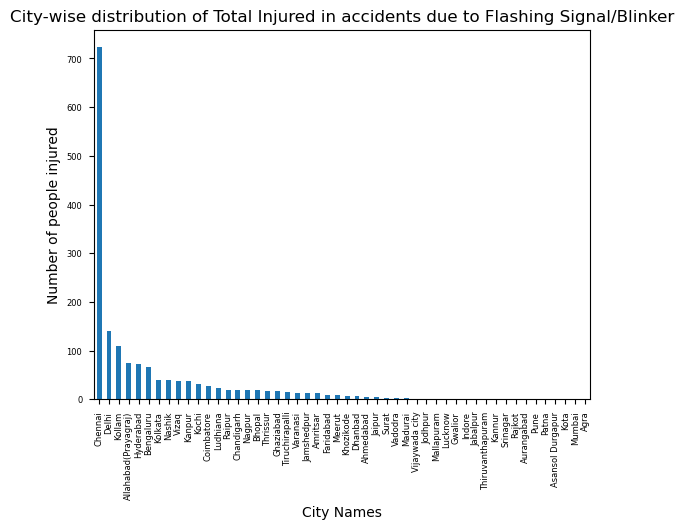

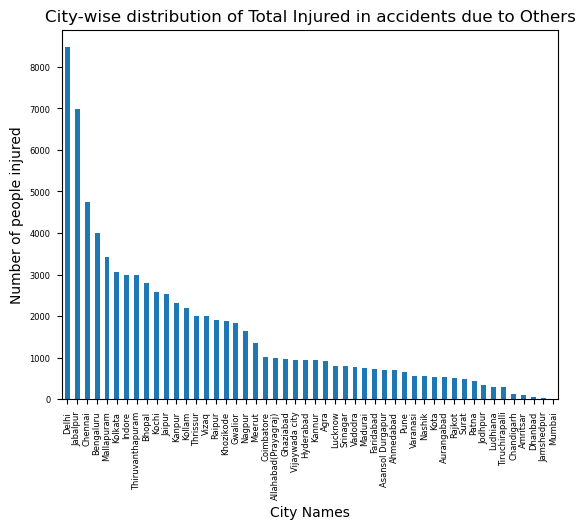

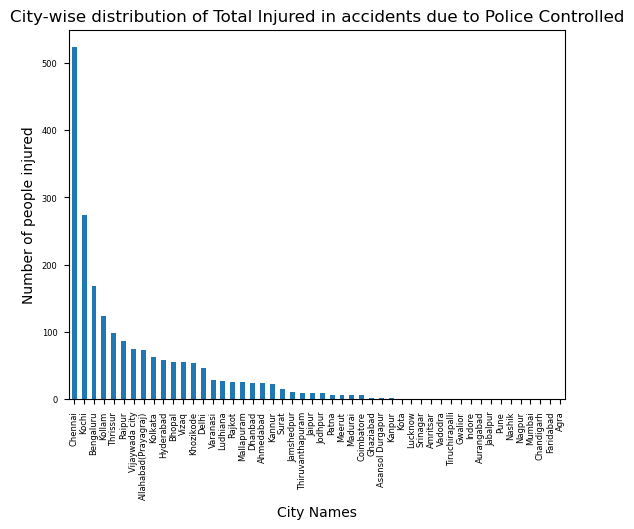

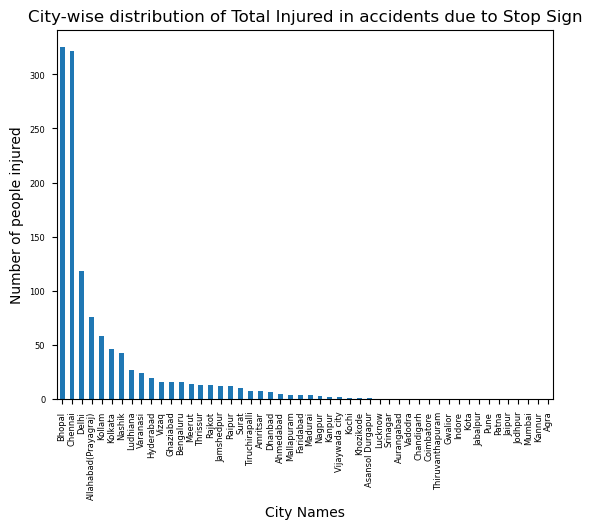

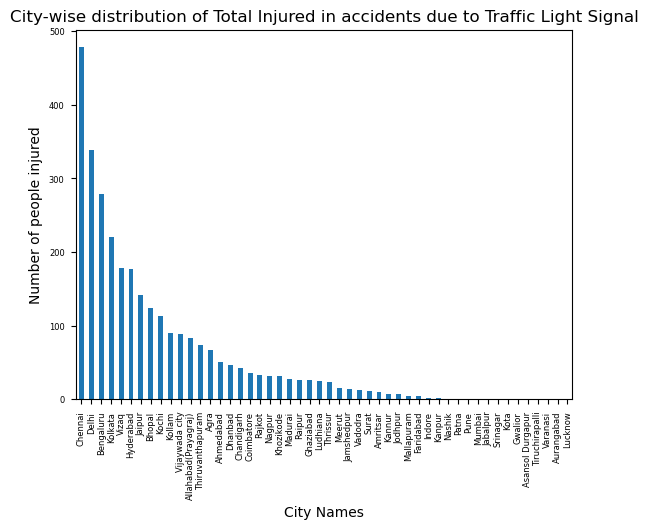

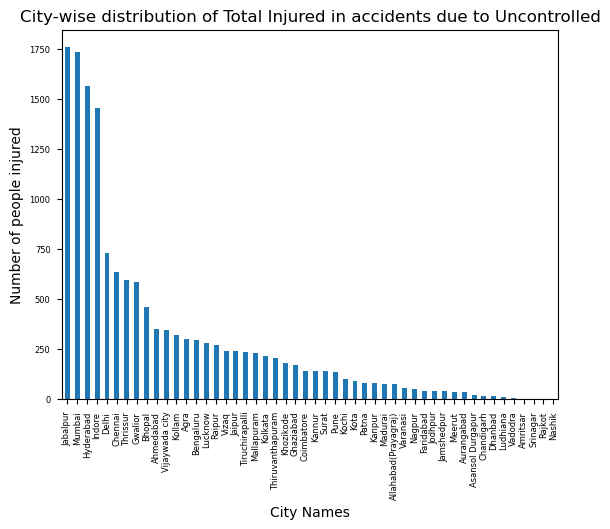

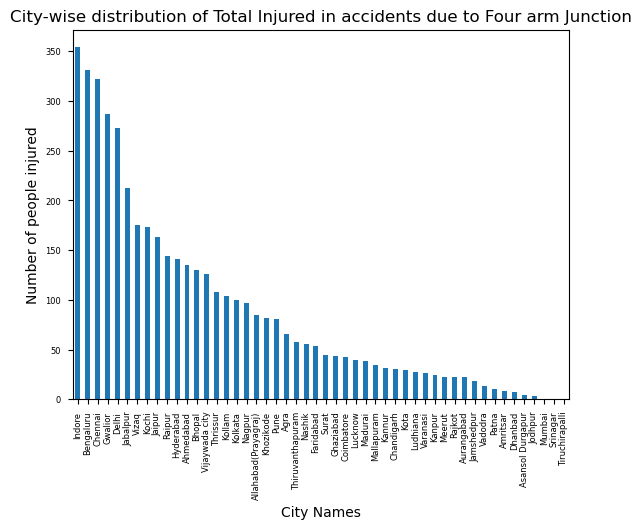

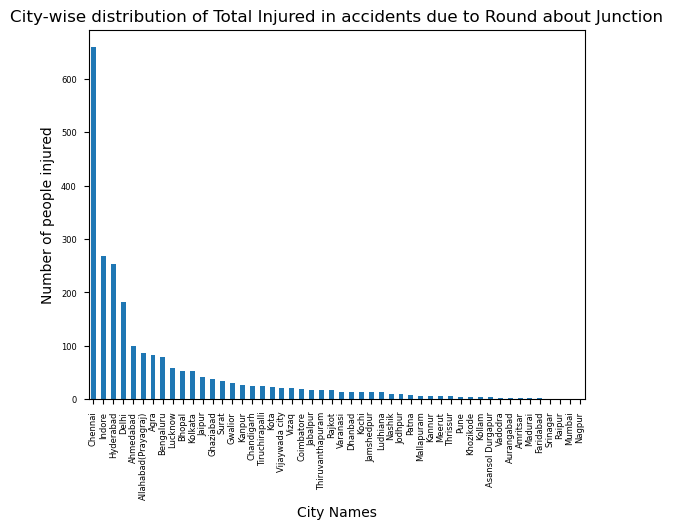

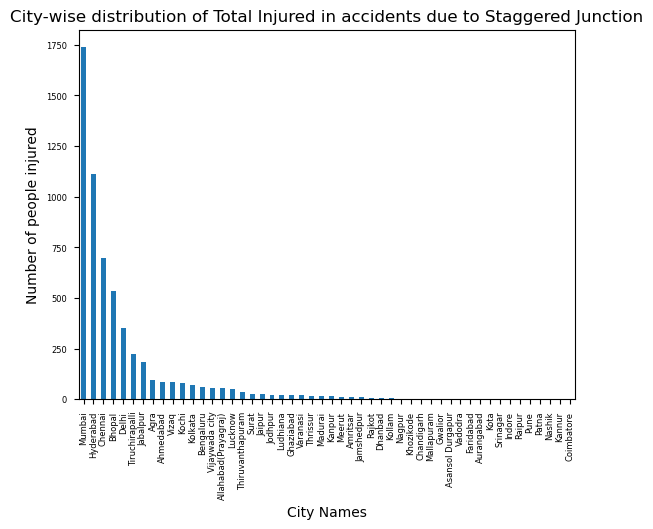

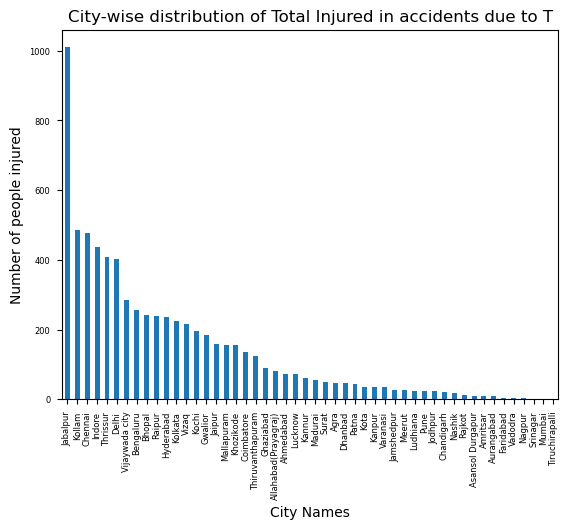

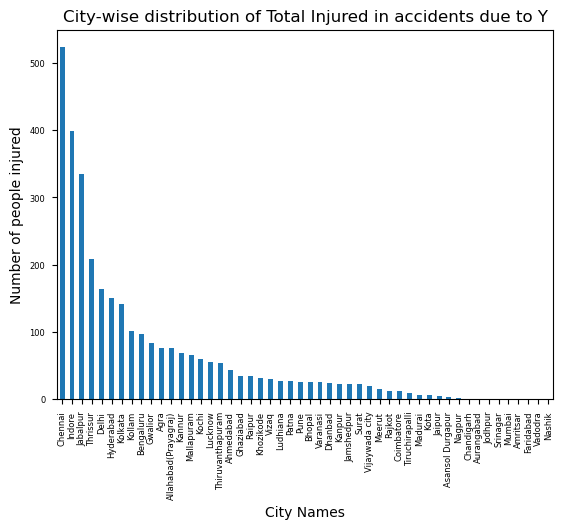

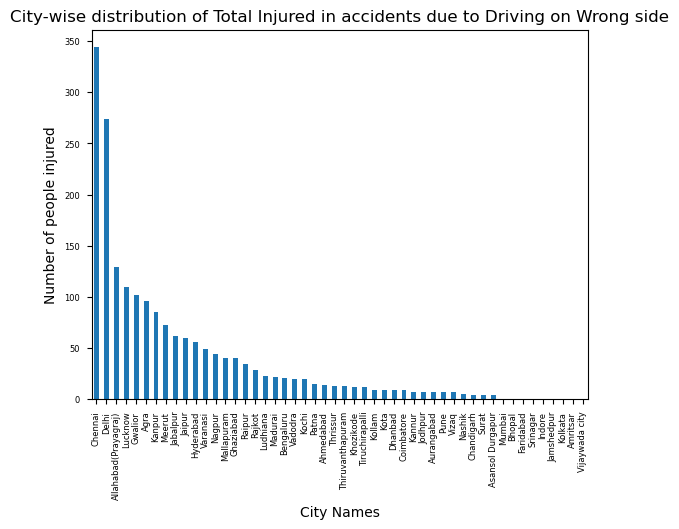

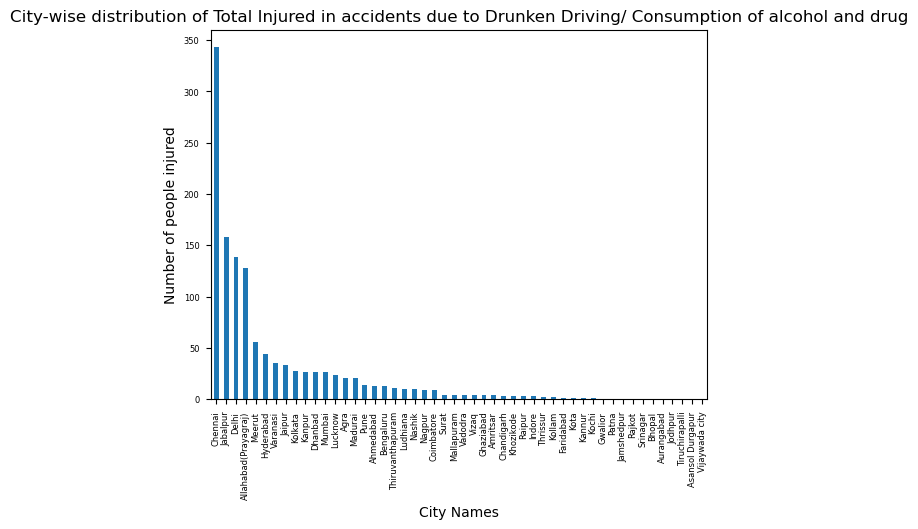

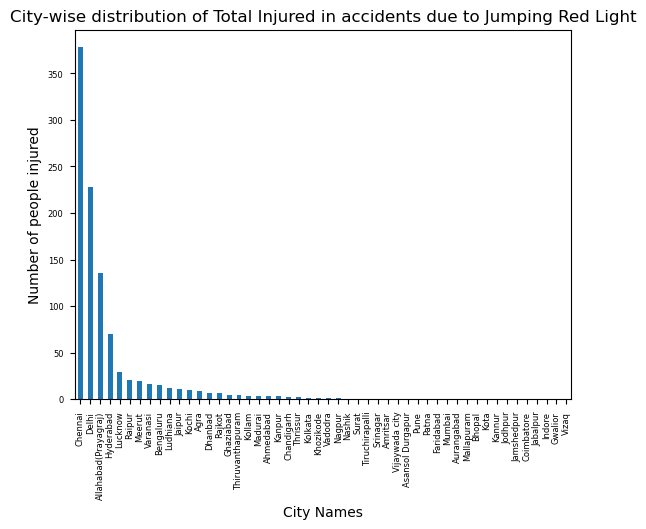

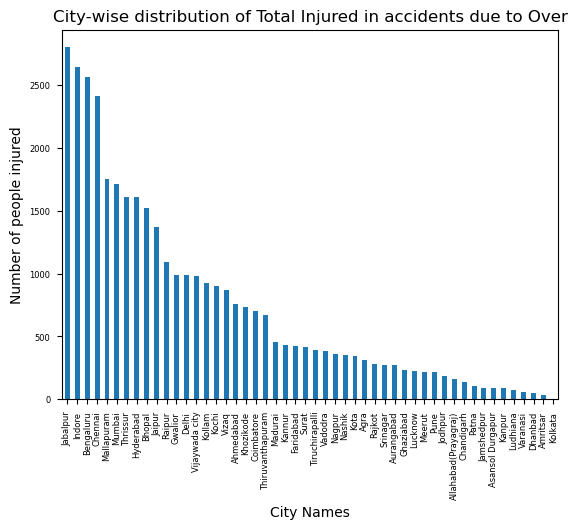

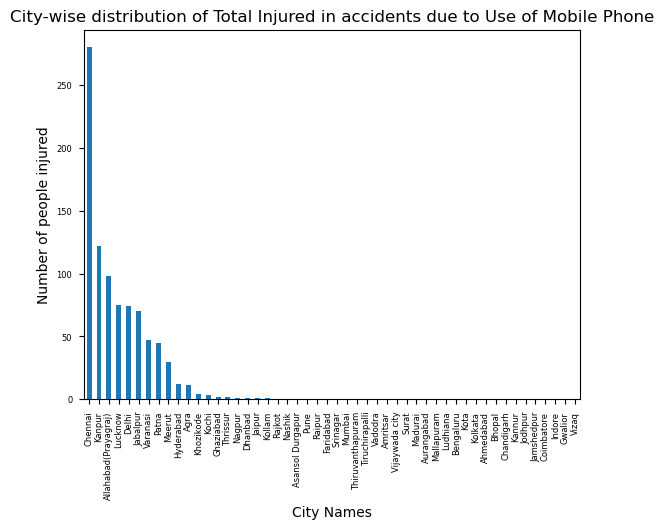

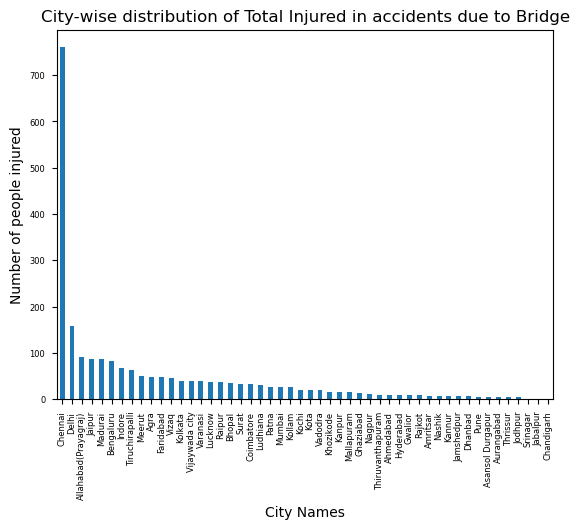

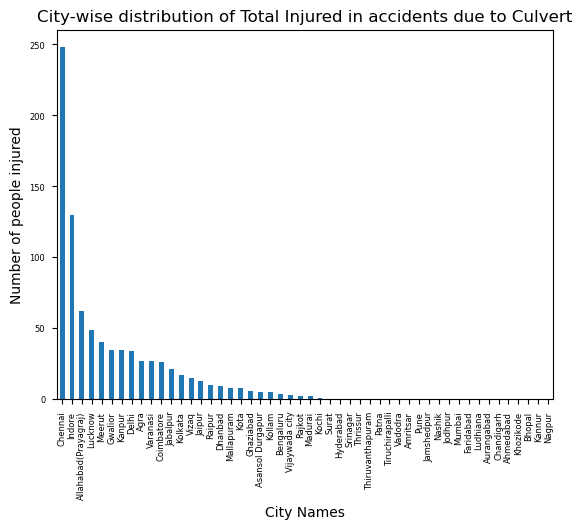

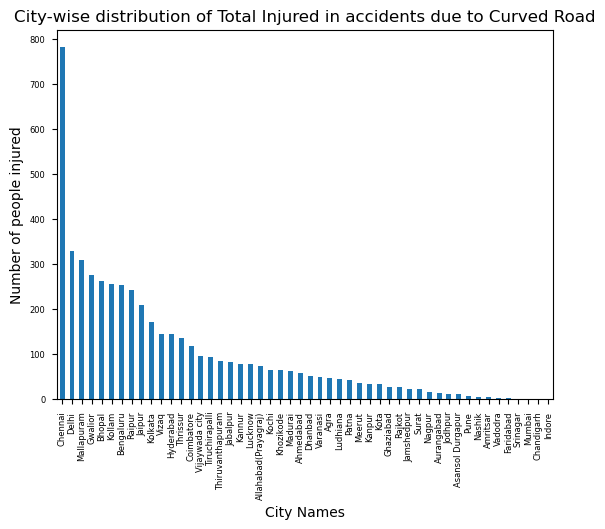

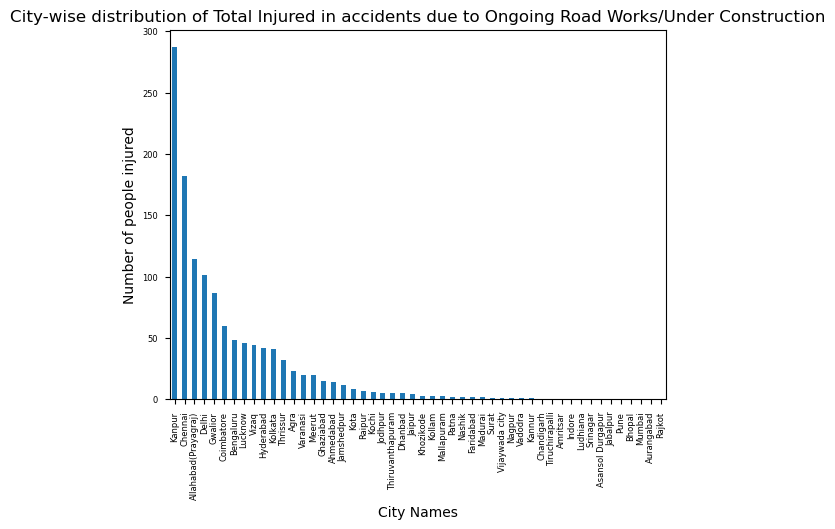

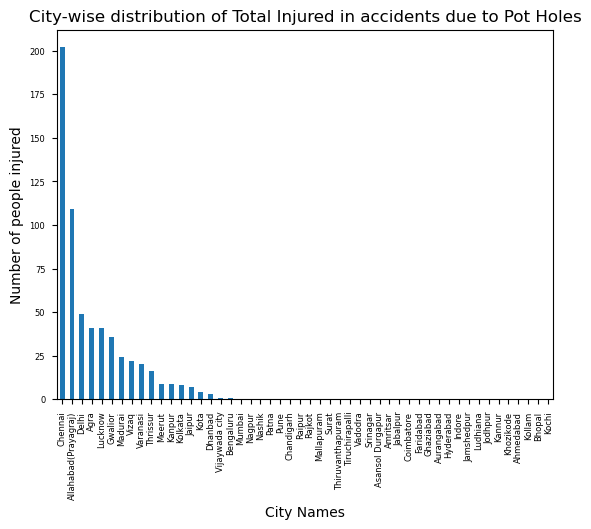

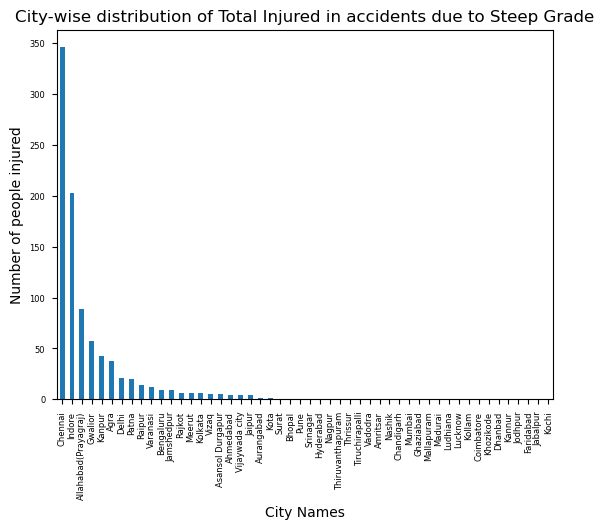

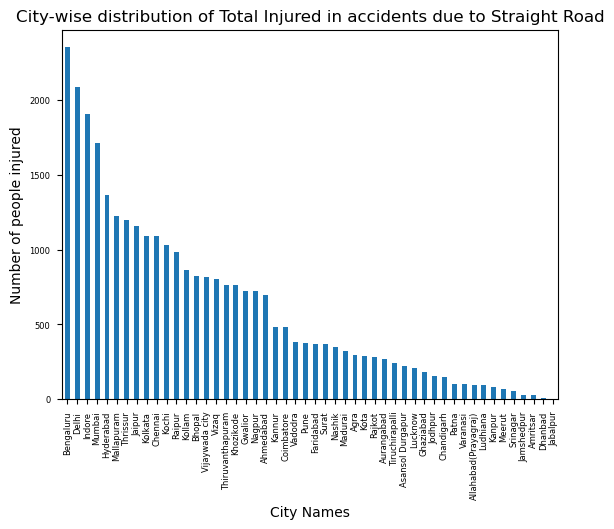

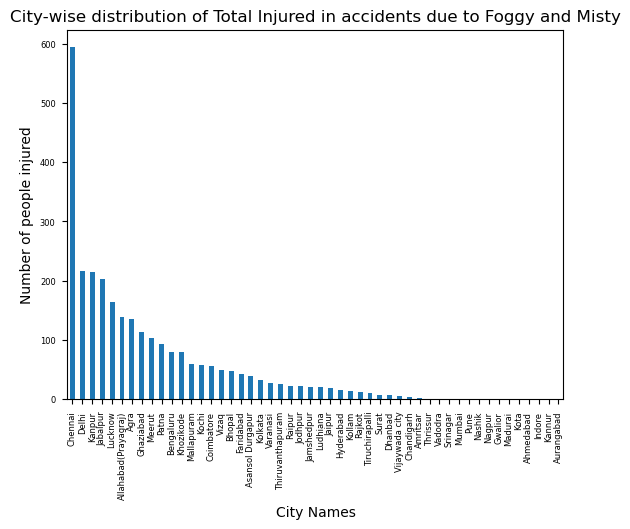

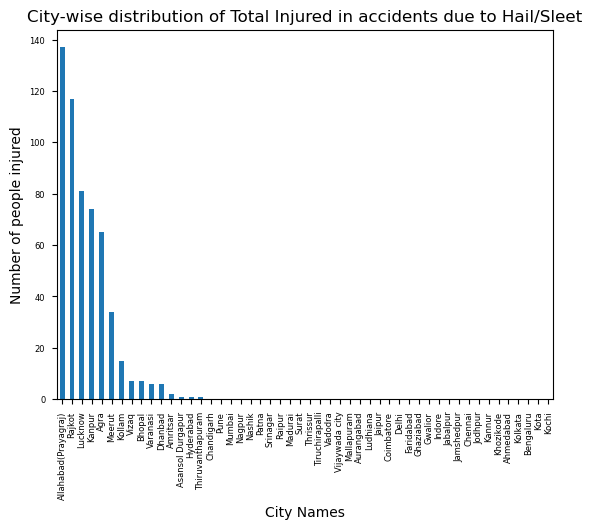

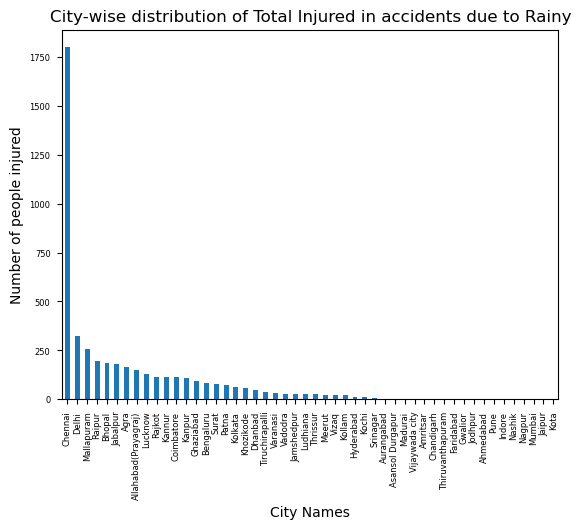

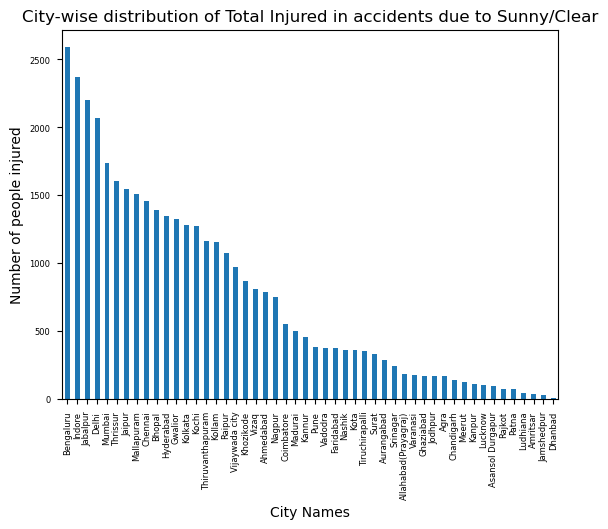

In [29]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for label in injured_subcat_labels:
    
    # Create a mask to filter out the data for each cause subcategory
    label_mask = total_injured_mask[total_injured_mask['cause_subcategory']==label]
    
    subcat_label_mask = total_injured_mask[total_injured_mask['cause_subcategory']==label]
    subcat_injured = subcat_label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)
    
    subcat_injured.plot(kind='bar', title="City-wise distribution of Total Injured in accidents due to "+ label, xlabel="City Names", ylabel="Number of people injured", legend=False)

    plt.tick_params(pad=5, labelsize=6)
    plt.show()

# Analysis : Persons Killed

In [30]:
# Create a Mask with outcome of Incident : "Persons Killed"
total_killed_mask = df[df['outcome_of_incident']=="Persons Killed"]

## Bar Chart distribution of accident deaths across cities

<Figure size 5000x1500 with 0 Axes>

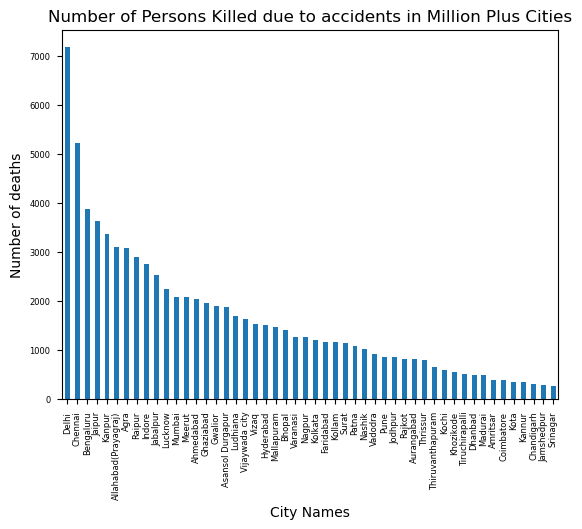

In [31]:
plt.figure(figsize=(50, 15))

# Group by cities w.r.t outcome : 'Persons Killed'
cat_grp_killed = total_killed_mask.groupby(['million_plus_cities']).agg('sum')[['count']]\
    .sort_values(by='count', ascending=False)

# Create a Barplot of Persons Killed w.r.t cities
cat_grp_killed.plot(kind="bar", title="Number of Persons Killed due to accidents in Million Plus Cities", legend=False, xlabel="City Names", ylabel="Number of deaths")

plt.tick_params(pad=5, labelsize=6)
plt.show()

## Percentage distribution of accident deaths across cities

In [32]:
# Calculate % of killed w.r.t cities
cat_grp_killed['percent'] = cat_grp_killed.transform(lambda x: (x/x.sum()) * 100)
cat_grp_killed

count   percent
million_plus_cities                   
Delhi                 7176.0  8.831783
Chennai               5232.0  6.439226
Bengaluru             3876.0  4.770344
Jaipur                3636.0  4.474967
Kanpur                3378.0  4.157436
Allahabad(Prayagraj)  3102.0  3.817752
Agra                  3084.0  3.795599
Raipur                2892.0  3.559297
Indore                2754.0  3.389455
Jabalpur              2532.0  3.116231
Lucknow               2244.0  2.761778
Mumbai                2094.0  2.577167
Meerut                2094.0  2.577167
Ahmedabad             2040.0  2.510707
Ghaziabad             1956.0  2.407325
Gwalior               1896.0  2.333481
Asansol Durgapur      1890.0  2.326097
Ludhiana              1698.0  2.089795
Vijaywada city        1644.0  2.023335
Vizaq                 1530.0  1.883031
Hyderabad             1524.0  1.875646
Mallapuram            1482.0  1.823955
Bhopal                1422.0  1.750111
Varanasi              1278.0  1.572884
Nagpur                1260.0  1.550731
Kolkata               1206.0  1.484271
Faridabad             1170.0  1.439965
Kollam                1164.0  1.432580
Surat                 1146.0  1.410427
Patna                 1086.0  1.336582
Nashik                1026.0  1.262738
Vadodra                918.0  1.129818
Pune                   858.0  1.055974
Jodhpur                852.0  1.048590
Rajkot                 828.0  1.019052
Aurangabad             816.0  1.004283
Thrissur               804.0  0.989514
Thiruvanthapuram       648.0  0.797519
Kochi                  606.0  0.745828
Khozikode              546.0  0.671983
Tiruchirapalli         522.0  0.642446
Dhanbad                498.0  0.612908
Madurai                486.0  0.598139
Amritsar               396.0  0.487373
Coimbatore             390.0  0.479988
Kota                   360.0  0.443066
Kannur                 342.0  0.420913
Chandigarh             318.0  0.391375
Jamshedpur             282.0  0.347068
Srinagar               270.0  0.332300

## Study w.r.t Cause Category and Sub-category

In [33]:
killed_subcat_labels = total_killed_mask['cause_subcategory'].unique()

<Figure size 5000x2000 with 0 Axes>

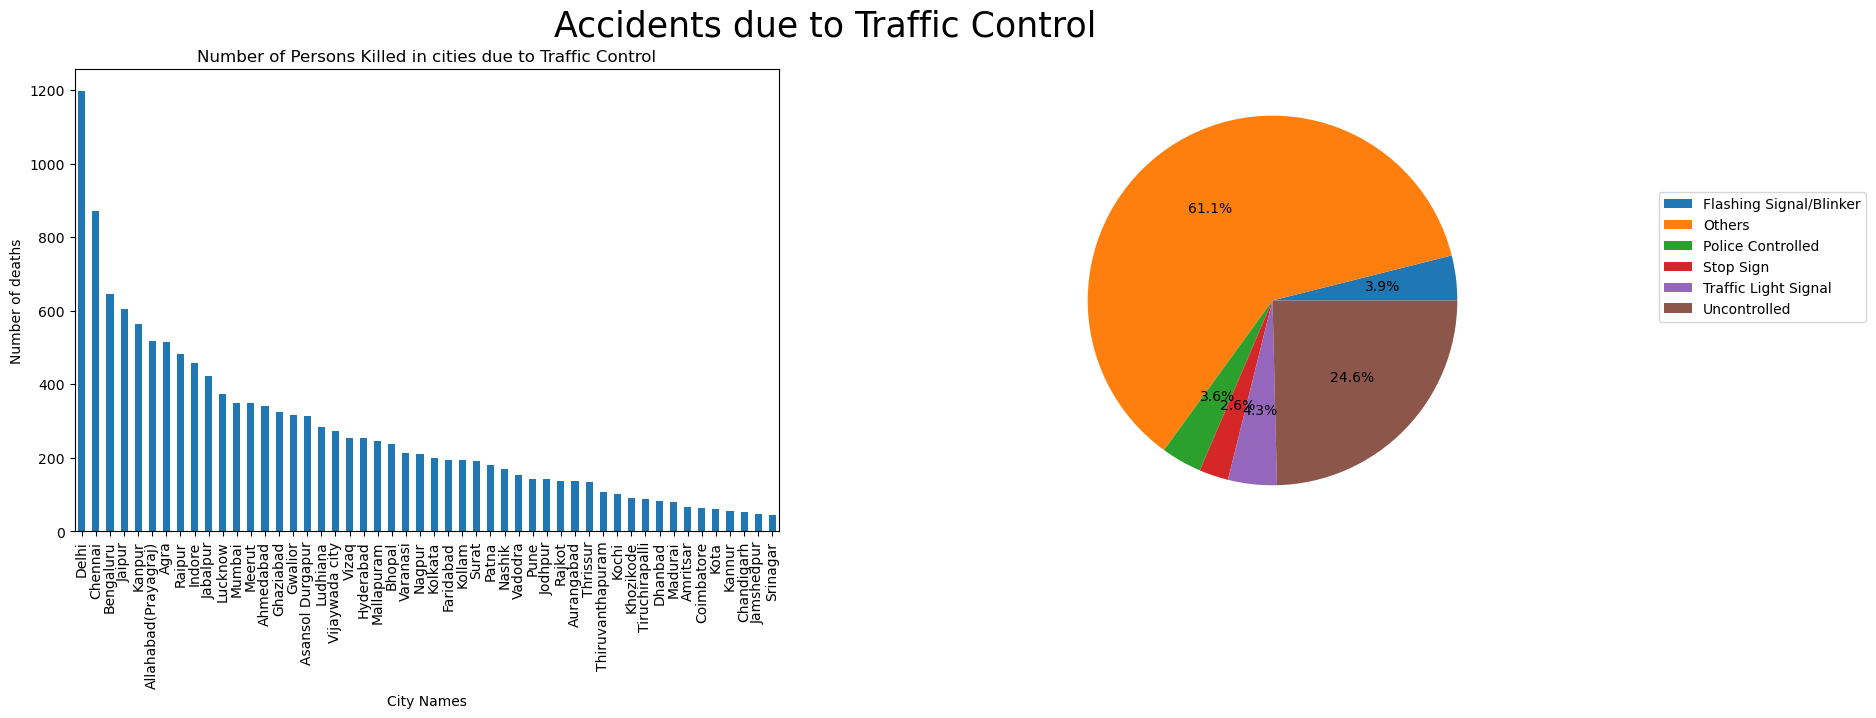

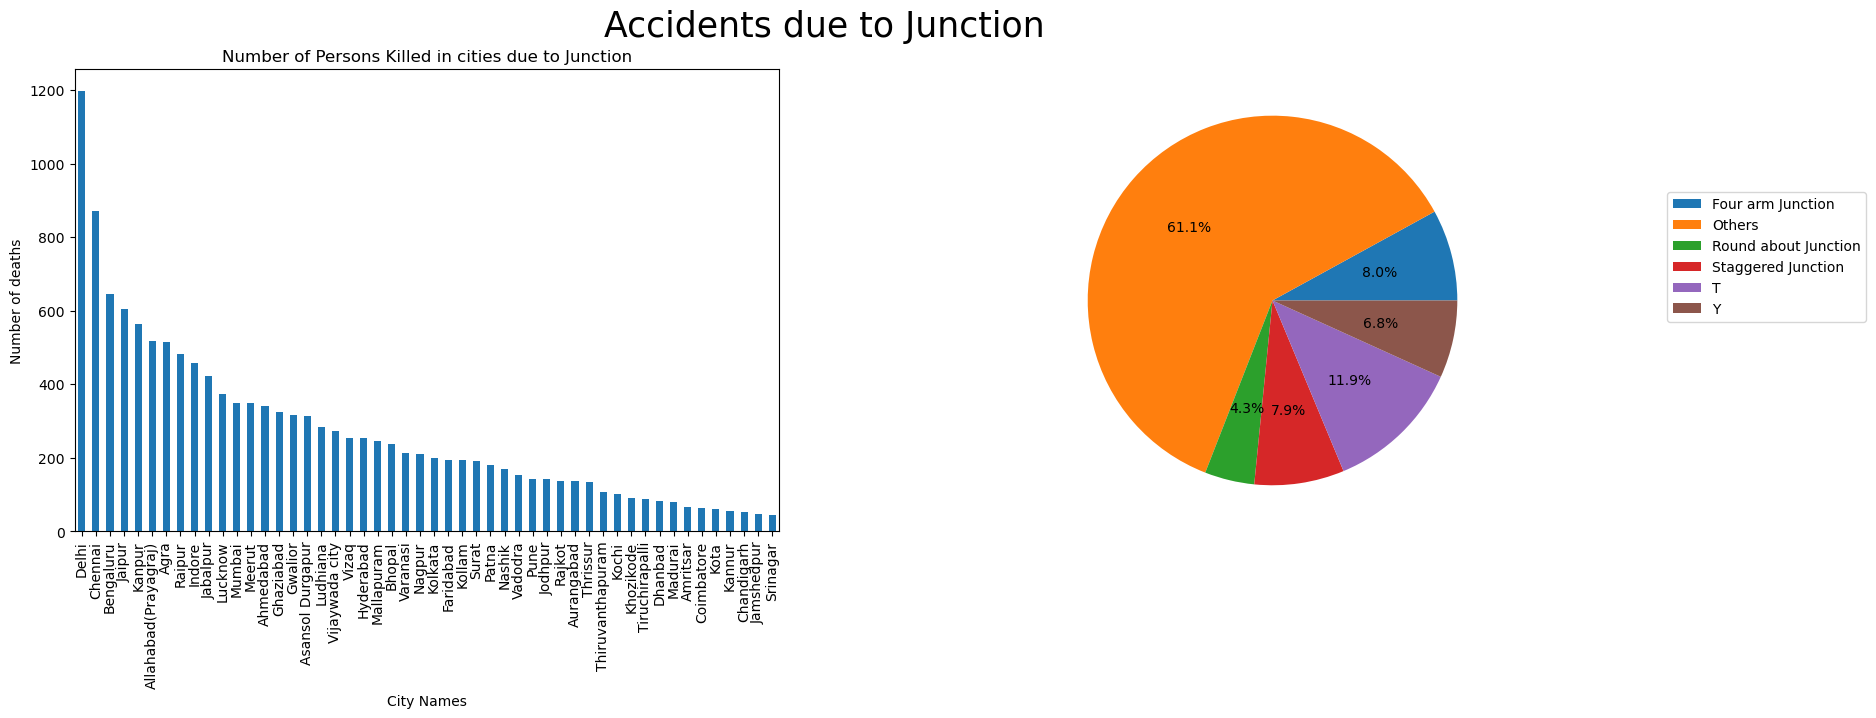

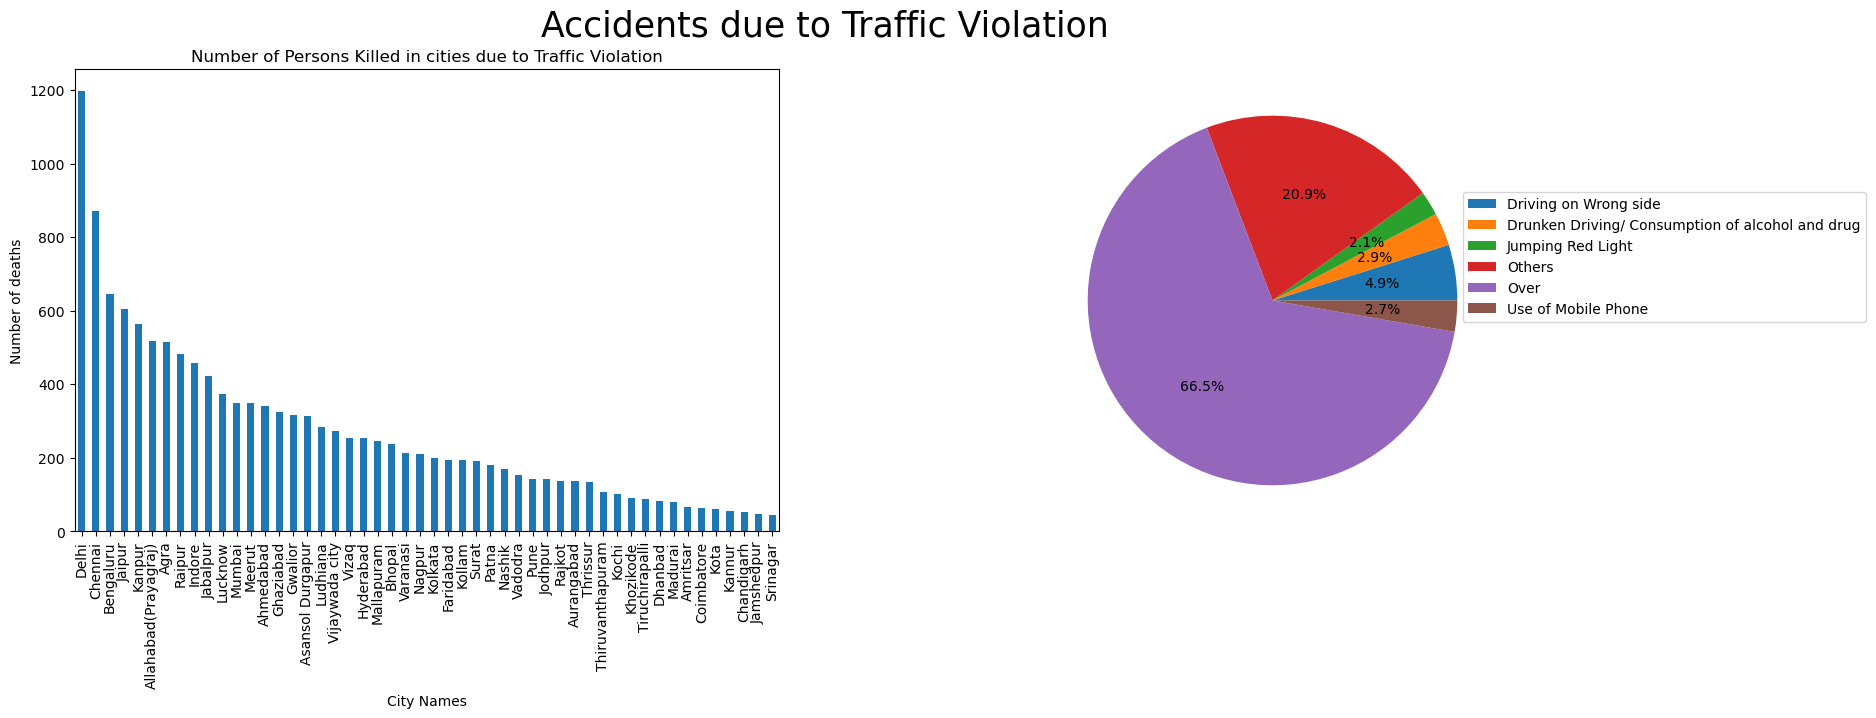

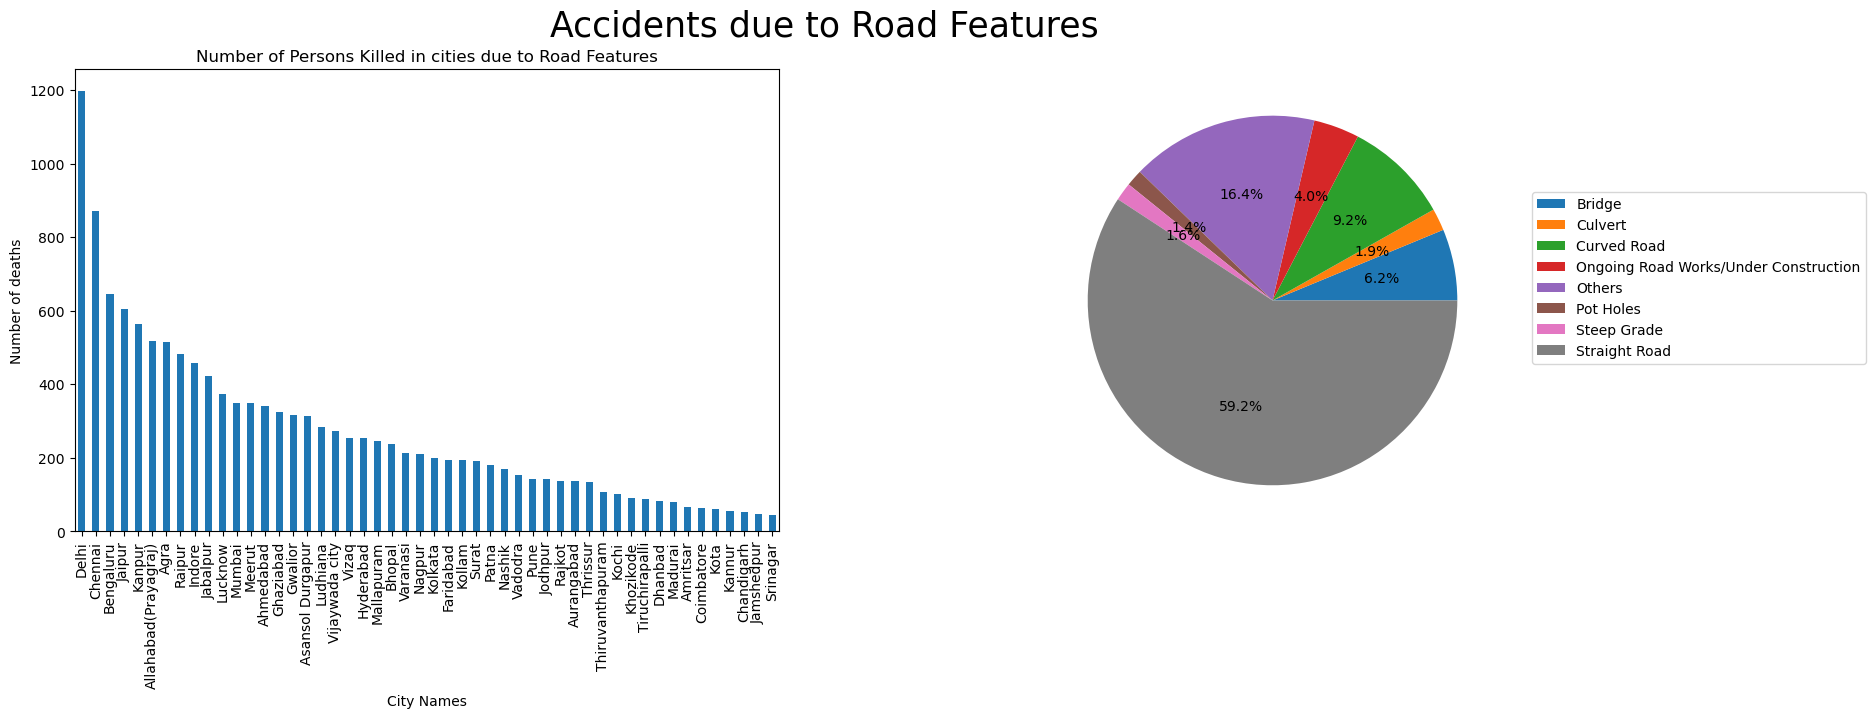

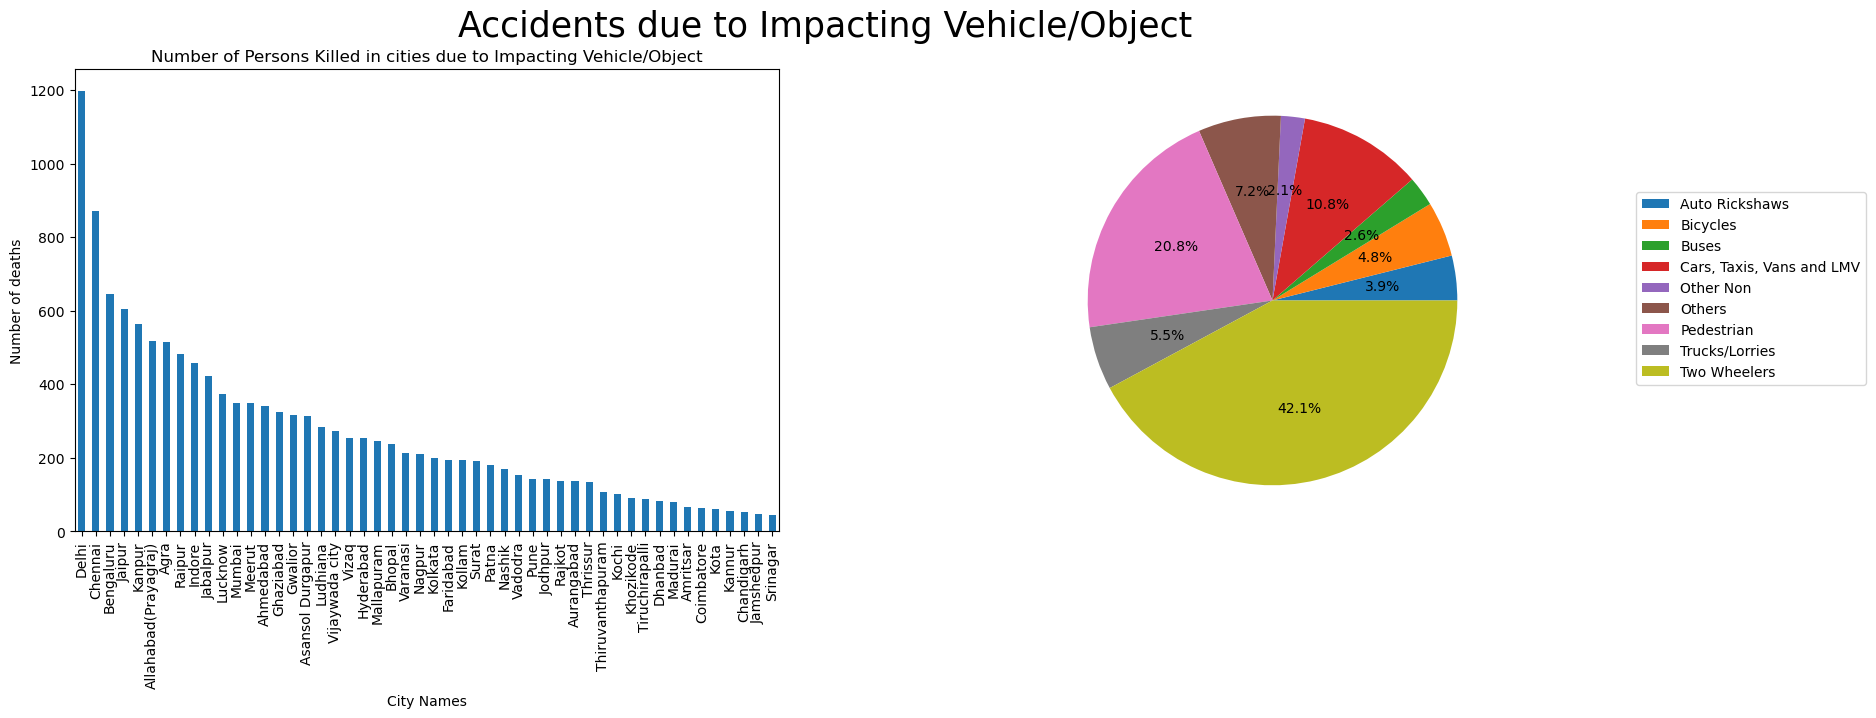

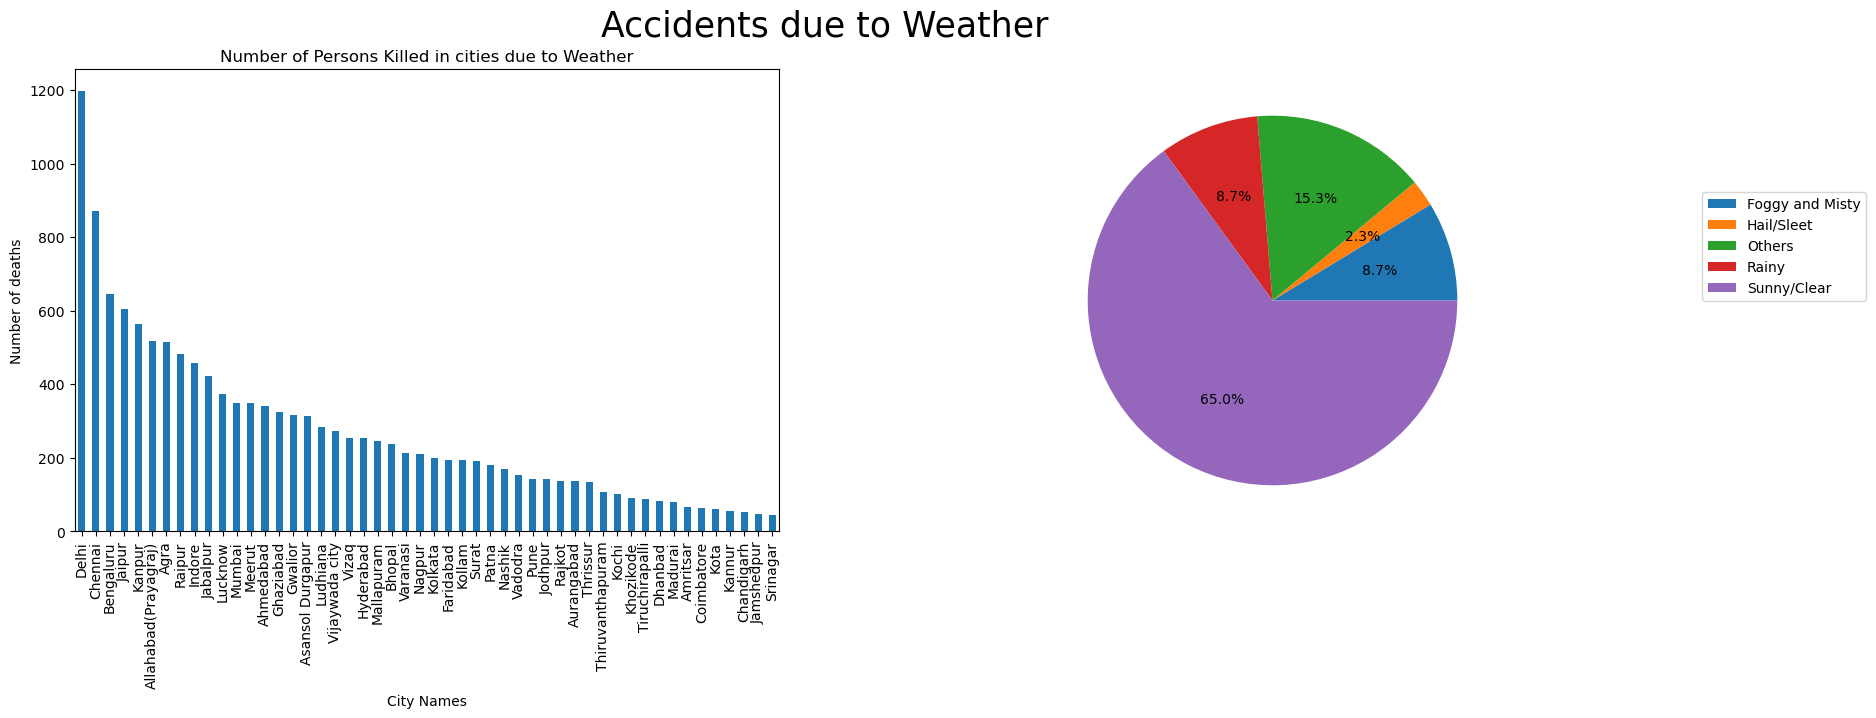

In [34]:
# Create a list of the unique cause categories for the outcome : 'persons killed'
killed_cat_labels = total_killed_mask['cause_category'].unique()

plt.figure(figsize=(50, 20))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

# For each cause category create plots
for label in killed_cat_labels:
    # Create a figure for each cause category with 2 axes
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    # Add title to the main figure
    plt.suptitle("Accidents due to "+label, fontsize=25, horizontalalignment='center')
    
    # Create a mask to filter out the data for each cause category
    label_mask = total_killed_mask[total_killed_mask['cause_category']==label]
    
    # Group by the locations and create a bar chart based on each cause category 
    cat_killed = label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)   
    cat_killed.plot(kind='bar', legend=False, title="Number of Persons Killed in cities due to "+label, ax=axes[0], xlabel="City Names", ylabel="Number of deaths")
    
    # Improve spacing of labels in the plotted bar chart
    plt.tick_params(pad=5, labelsize=6)
    
    # Group by related subcategories of the cause category and create a pie chart of the cause sub-category
    subcat_labels_grp = label_mask.groupby(['cause_subcategory']).agg('sum')[['count']]
    subcat_labels_grp.plot(kind='pie', subplots=True, ylabel='', labeldistance=None, ax=axes[1], autopct='%1.1f%%')
    
    # Adjust spacing of legend for the pie chart
    plt.legend(bbox_to_anchor=(1.8, .75), loc="upper right")
    
    plt.show()

## List of cause sub-categories with top 3 cities

In [35]:
cause_city_df = pd.DataFrame(columns = ['cause_sub_category', 'top_cities'])

for label in killed_subcat_labels:
    label_mask = total_killed_mask[total_killed_mask['cause_subcategory']==label]
    
    subcat_label_mask = total_killed_mask[total_killed_mask['cause_subcategory']==label]
    subcat_killed = subcat_label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)
    # top 3 cities in subcategory
    top_3_cities = subcat_killed.head(3).reset_index()[['million_plus_cities']]
    cause_city_row = top_3_cities.apply(", ".join)

    data = pd.DataFrame({
            'cause_sub_category' : [label],
            'top_cities' : cause_city_row['million_plus_cities']
    })
    cause_city_df = pd.concat([cause_city_df, data])

cause_city_df

cause_sub_category  \
0                           Flashing Signal/Blinker   
0                                            Others   
0                                 Police Controlled   
0                                         Stop Sign   
0                              Traffic Light Signal   
0                                      Uncontrolled   
0                                 Four arm Junction   
0                              Round about Junction   
0                                Staggered Junction   
0                                                 T   
0                                                 Y   
0                             Driving on Wrong side   
0  Drunken Driving/ Consumption of alcohol and drug   
0                                 Jumping Red Light   
0                                              Over   
0                               Use of Mobile Phone   
0                                            Bridge   
0                                           Culvert   
0                                       Curved Road   
0             Ongoing Road Works/Under Construction   
0                                         Pot Holes   
0                                       Steep Grade   
0                                     Straight Road   
0                                    Auto Rickshaws   
0                                          Bicycles   
0                                             Buses   
0                         Cars, Taxis, Vans and LMV   
0                                         Other Non   
0                                        Pedestrian   
0                                    Trucks/Lorries   
0                                      Two Wheelers   
0                                   Foggy and Misty   
0                                        Hail/Sleet   
0                                             Rainy   
0                                       Sunny/Clear   

                                  top_cities  
0                   Chennai, Delhi, Ludhiana  
0                      Delhi, Kanpur, Meerut  
0   Chennai, Allahabad(Prayagraj), Bengaluru  
0       Chennai, Allahabad(Prayagraj), Delhi  
0                     Delhi, Chennai, Jaipur  
0                   Mumbai, Delhi, Hyderabad  
0       Delhi, Chennai, Allahabad(Prayagraj)  
0     Chennai, Allahabad(Prayagraj), Lucknow  
0                  Chennai, Hyderabad, Delhi  
0                    Raipur, Jabalpur, Delhi  
0                     Mumbai, Chennai, Delhi  
0      Allahabad(Prayagraj), Lucknow, Kanpur  
0      Allahabad(Prayagraj), Delhi, Ludhiana  
0       Allahabad(Prayagraj), Delhi, Lucknow  
0                 Chennai, Bengaluru, Jaipur  
0      Allahabad(Prayagraj), Kanpur, Lucknow  
0                   Chennai, Ludhiana, Delhi  
0      Allahabad(Prayagraj), Lucknow, Kanpur  
0                     Delhi, Jaipur, Chennai  
0      Kanpur, Allahabad(Prayagraj), Chennai  
0        Allahabad(Prayagraj), Lucknow, Agra  
0         Allahabad(Prayagraj), Kanpur, Agra  
0                   Delhi, Bengaluru, Jaipur  
0  Allahabad(Prayagraj), Ghaziabad, Ludhiana  
0                   Chennai, Delhi, Ludhiana  
0      Lucknow, Allahabad(Prayagraj), Jaipur  
0                    Chennai, Jaipur, Kanpur  
0         Kanpur, Agra, Allahabad(Prayagraj)  
0                Delhi, Bengaluru, Ahmedabad  
0     Jaipur, Jabalpur, Allahabad(Prayagraj)  
0                  Delhi, Bengaluru, Chennai  
0                   Kanpur, Chennai, Lucknow  
0      Allahabad(Prayagraj), Rajkot, Lucknow  
0        Chennai, Agra, Allahabad(Prayagraj)  
0                   Delhi, Jaipur, Bengaluru

## Bar chart for each SubCategory across Cities**

<Figure size 3000x1200 with 0 Axes>

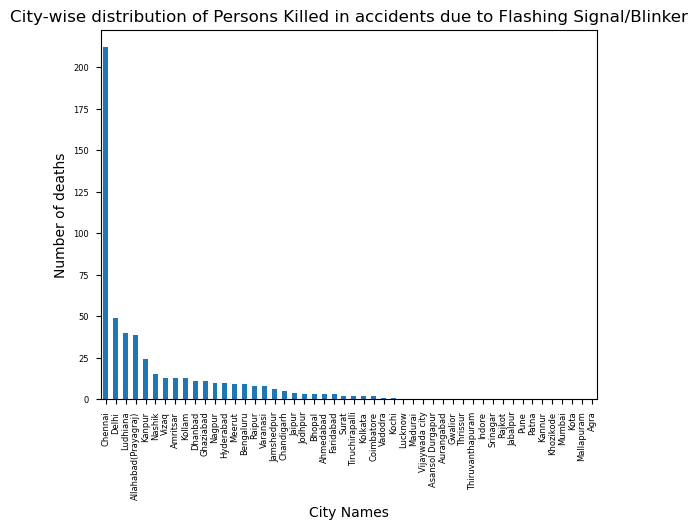

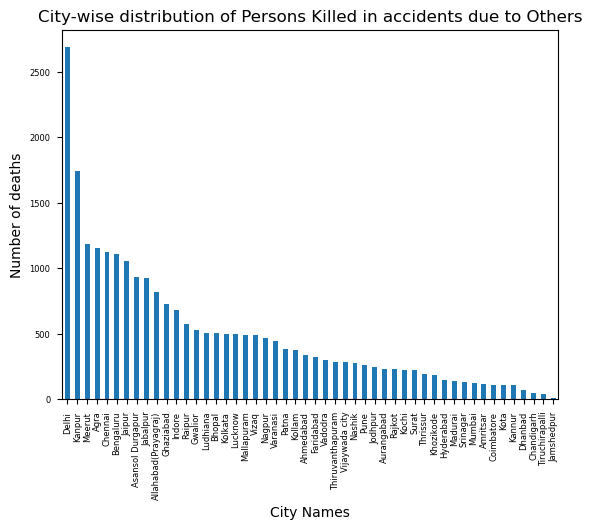

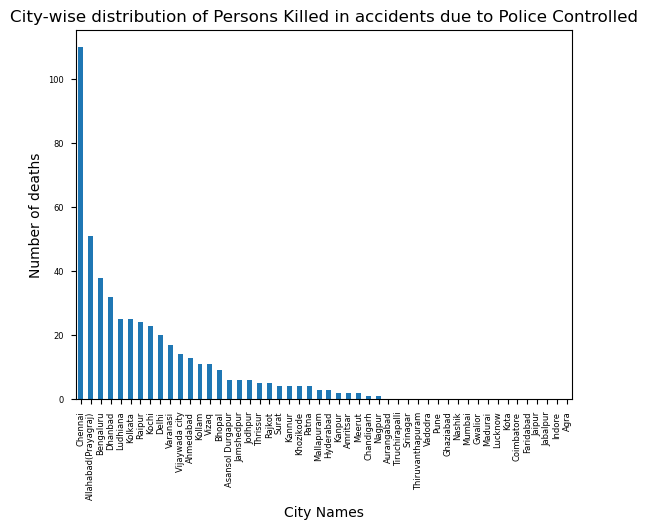

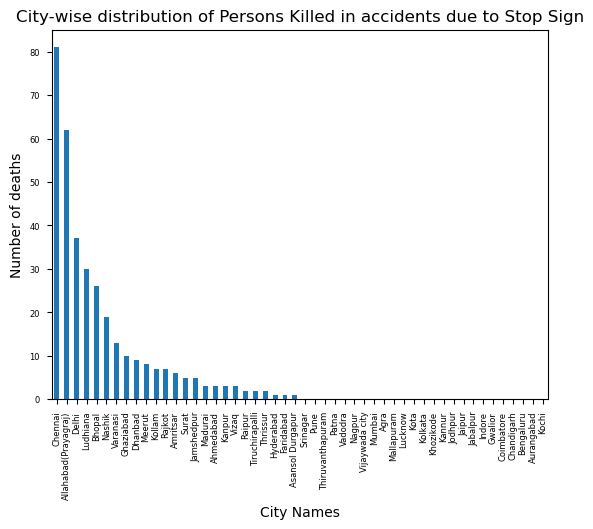

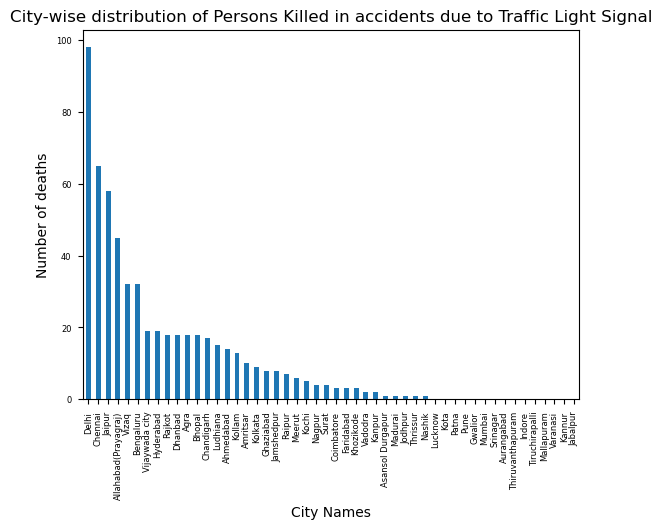

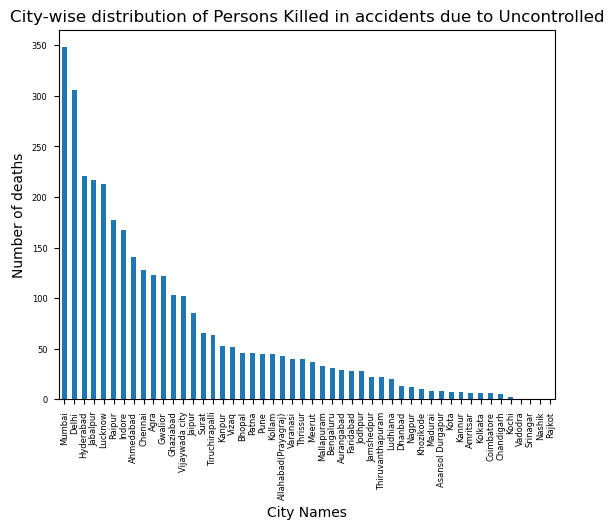

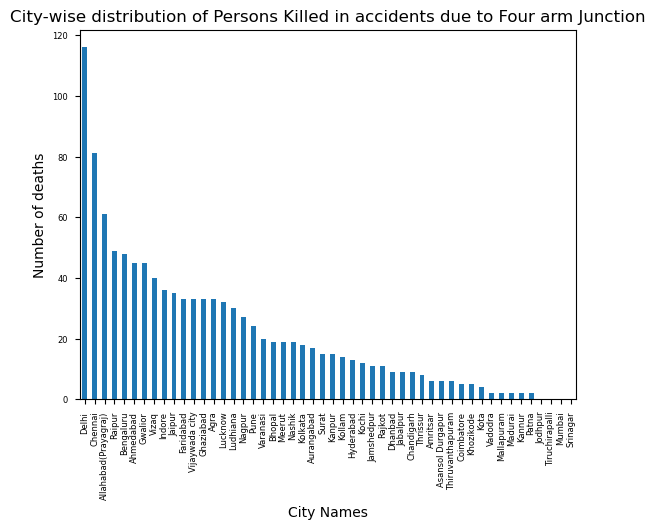

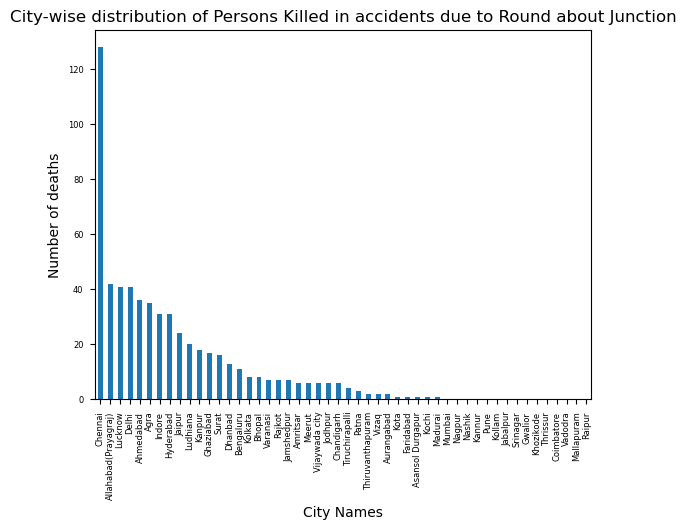

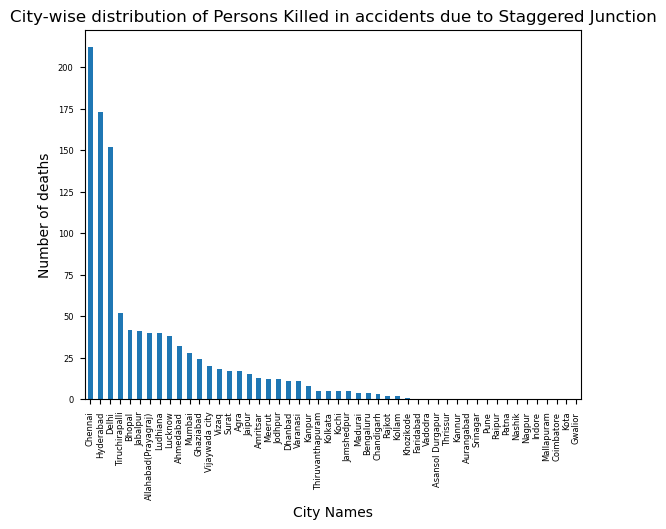

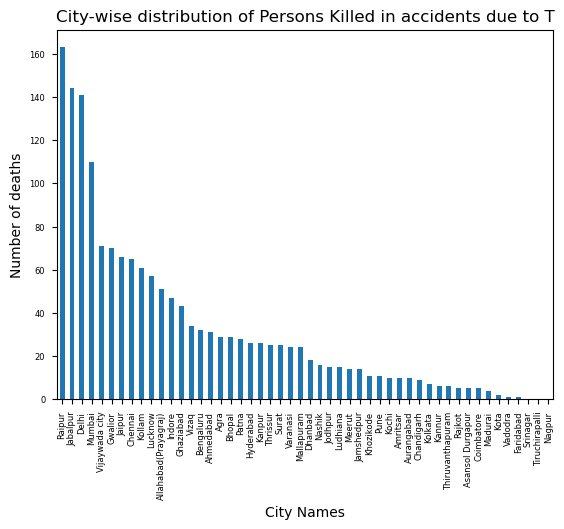

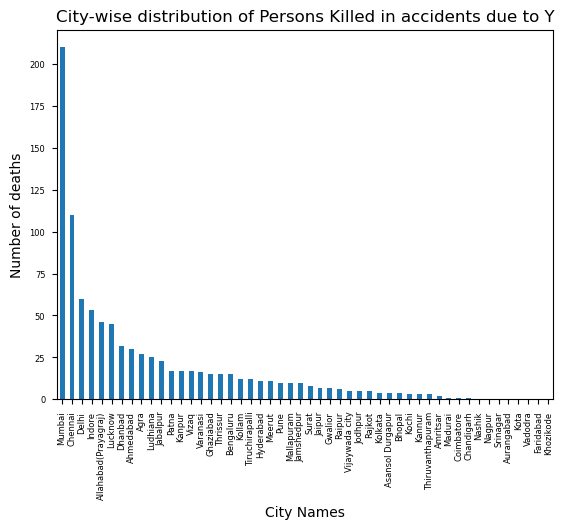

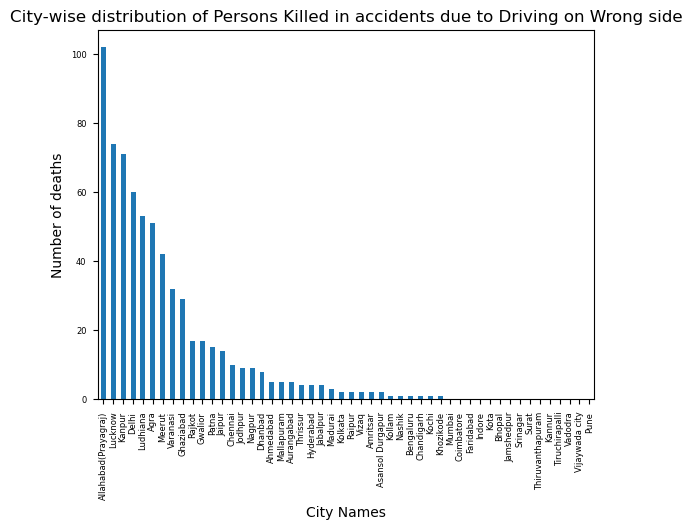

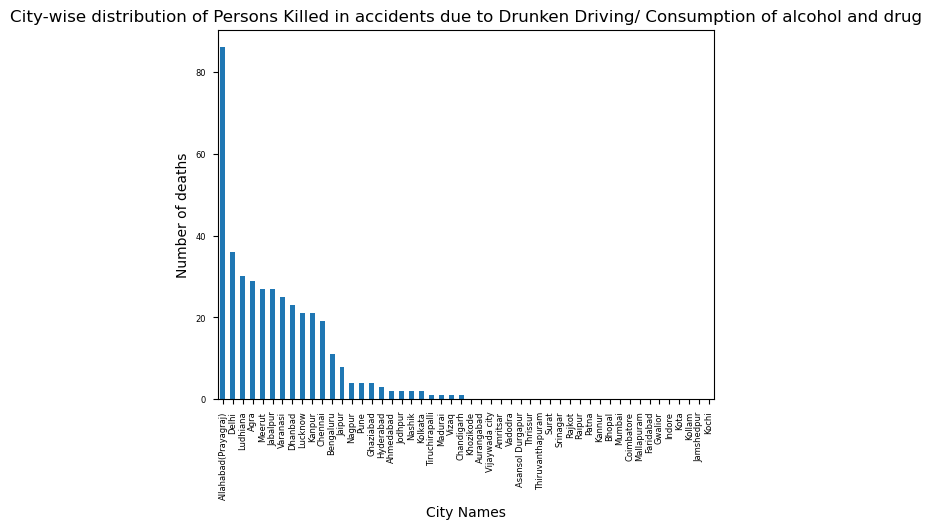

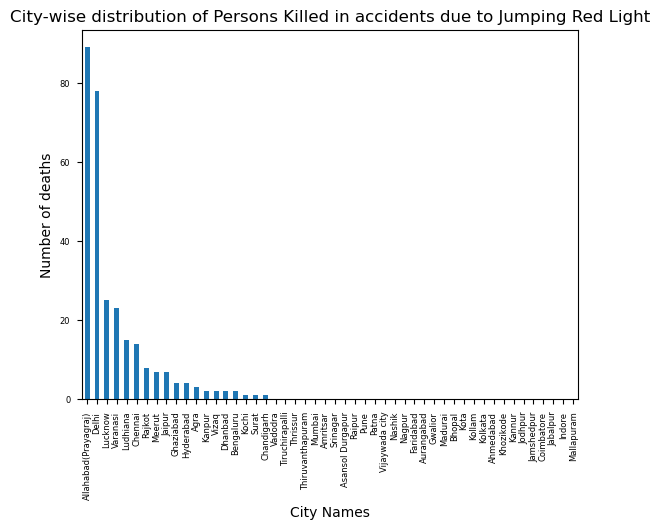

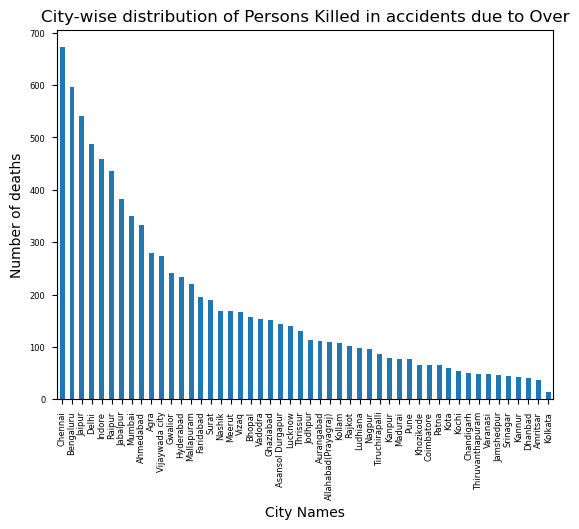

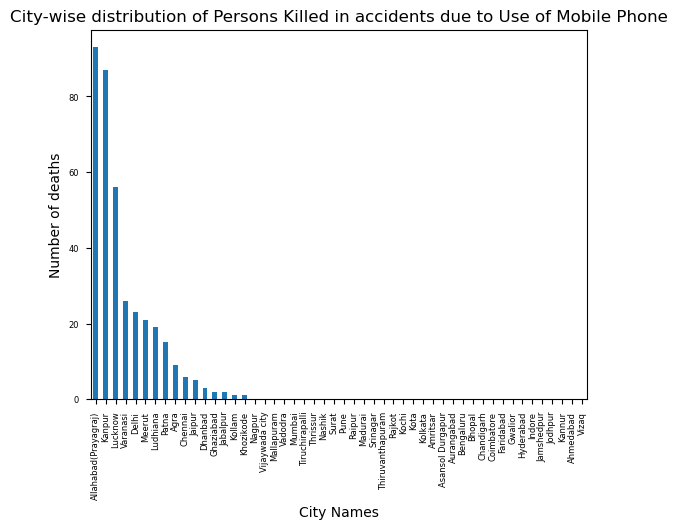

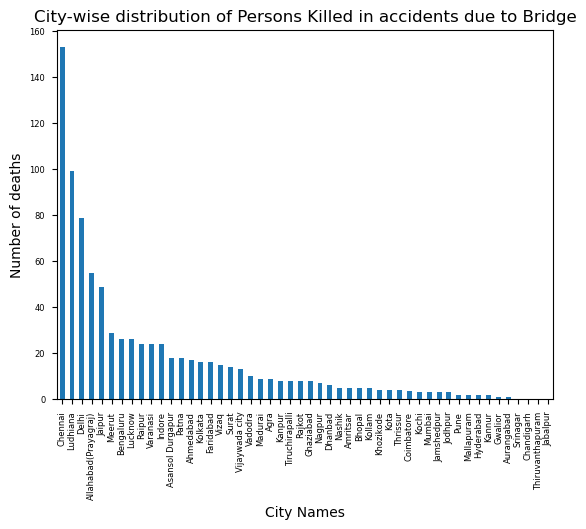

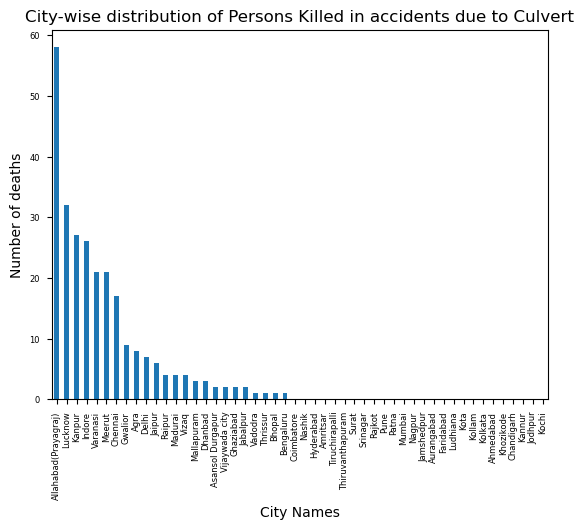

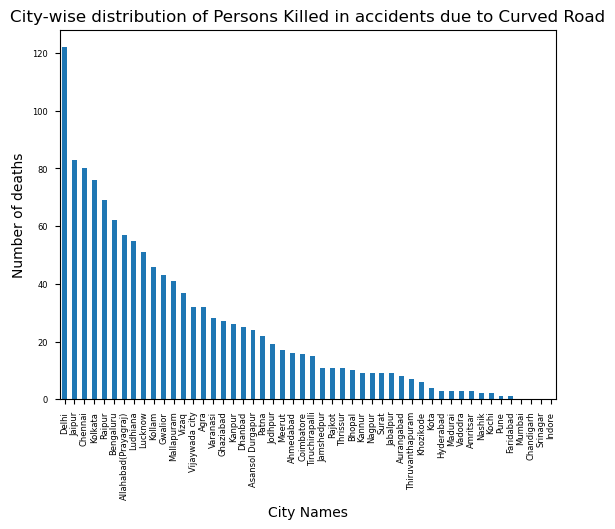

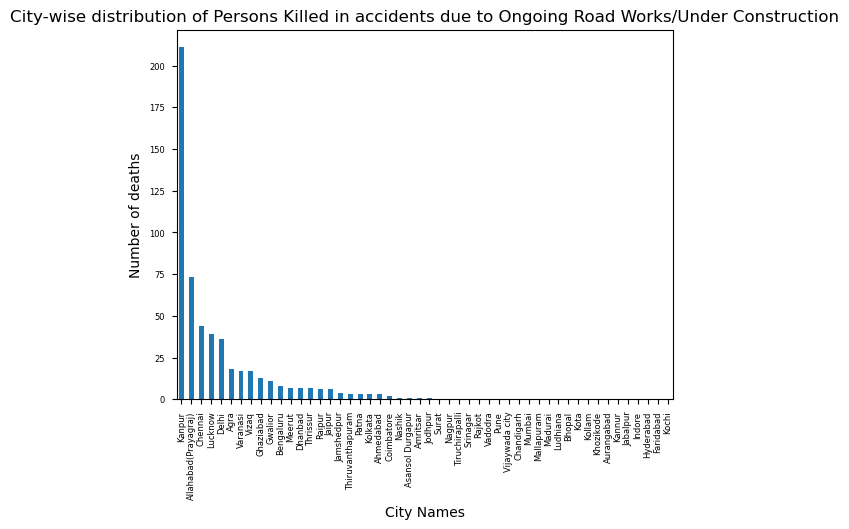

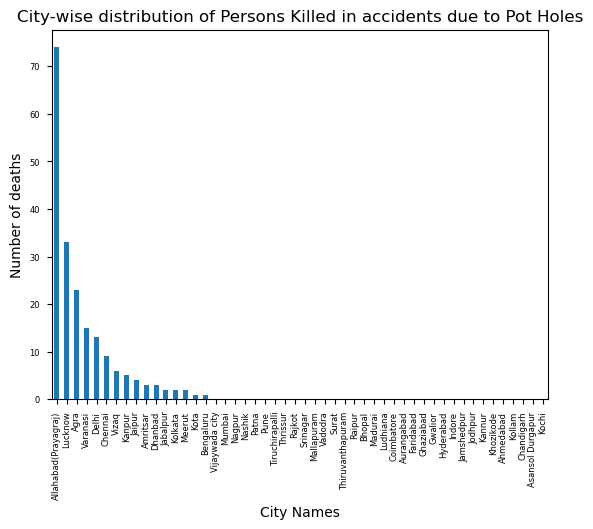

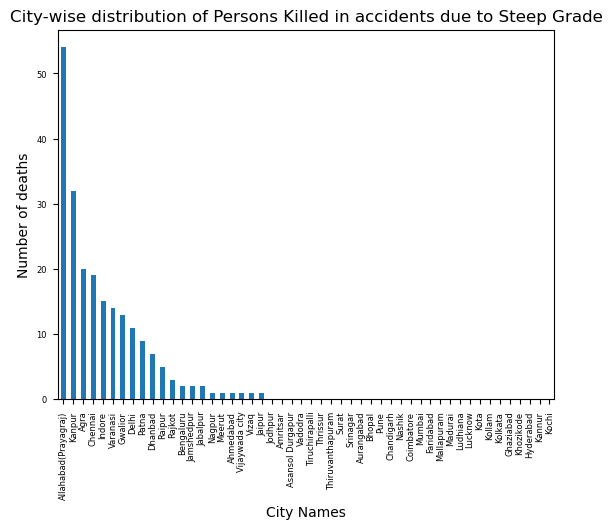

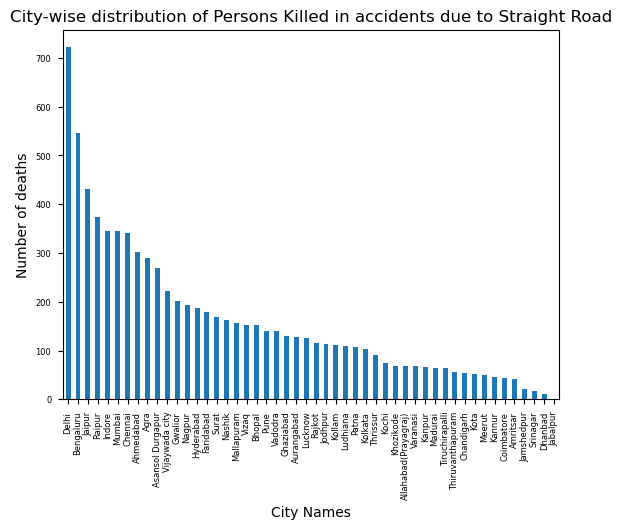

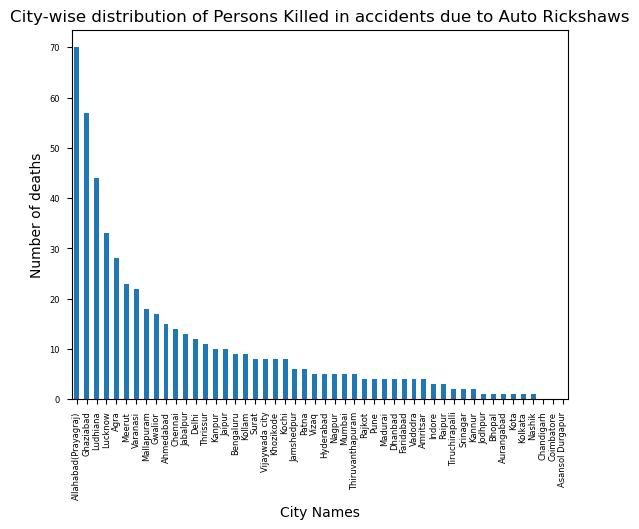

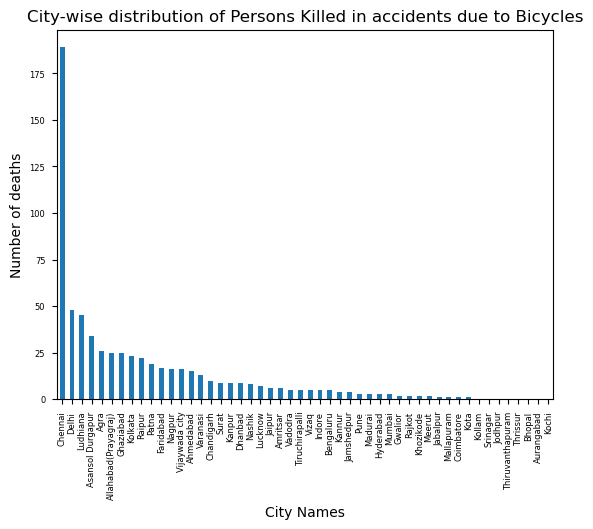

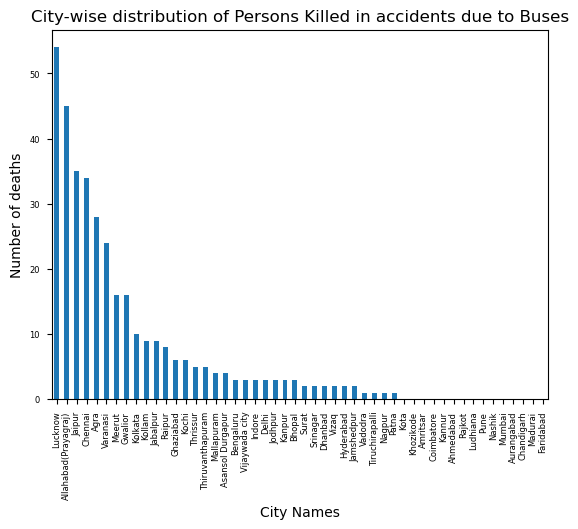

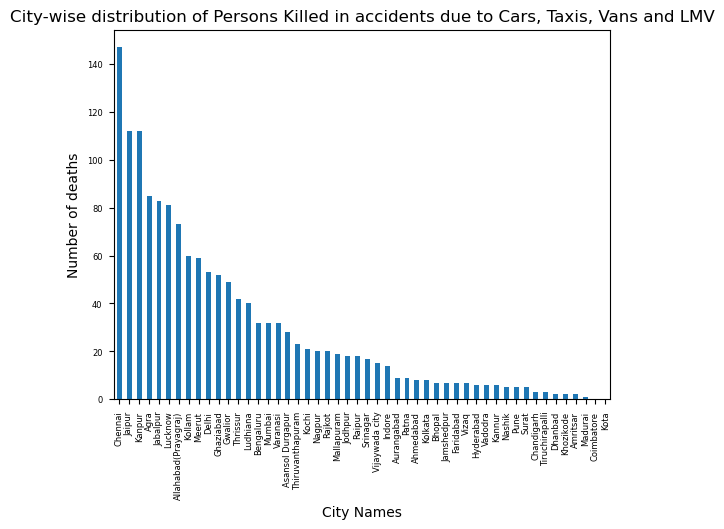

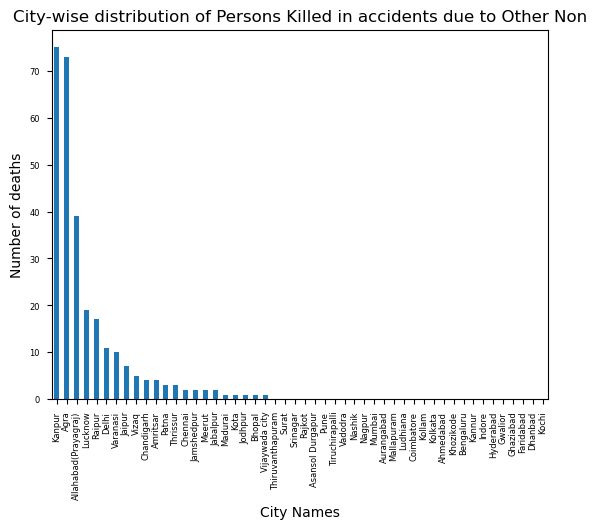

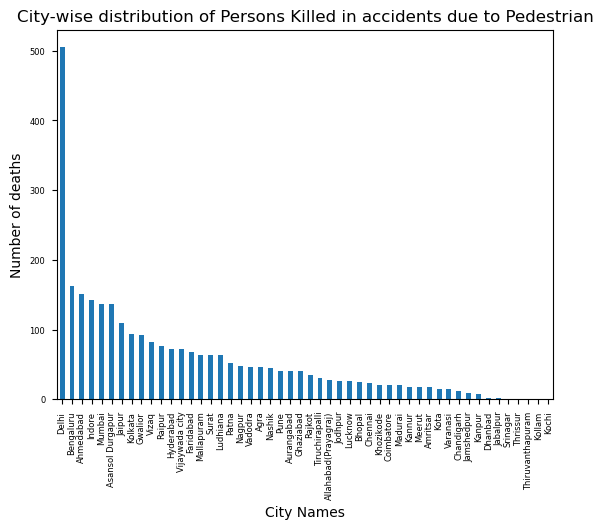

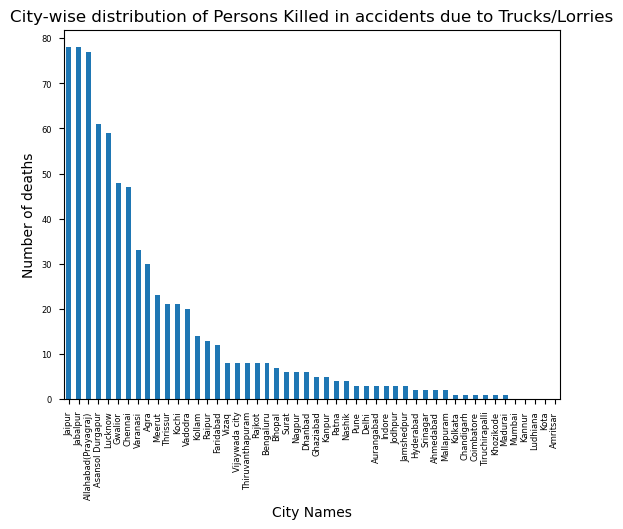

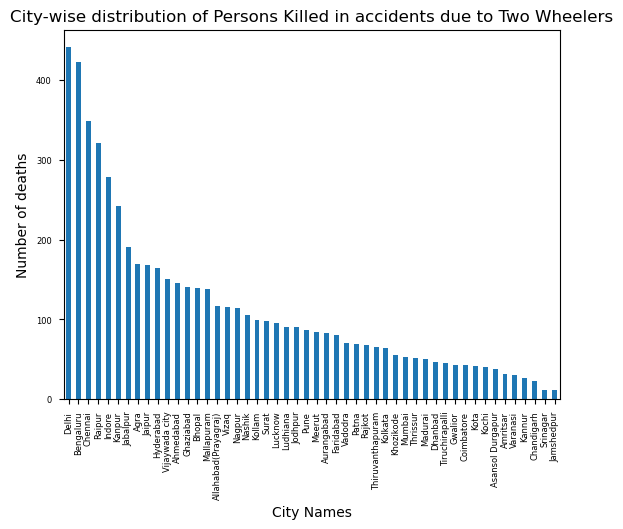

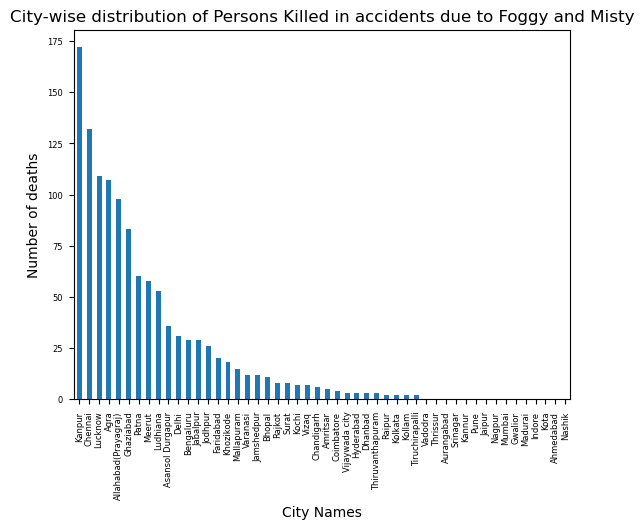

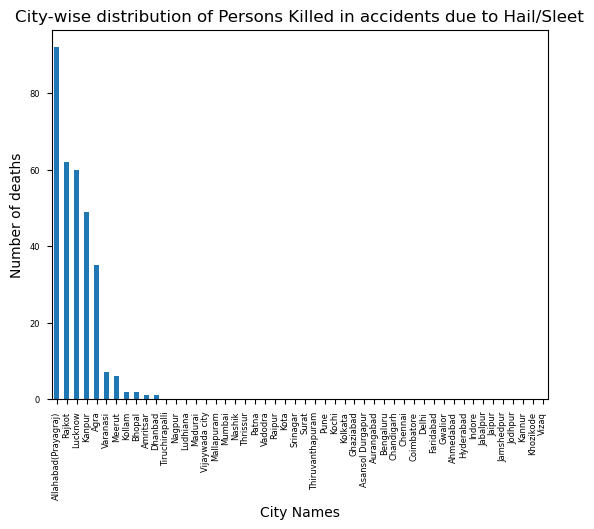

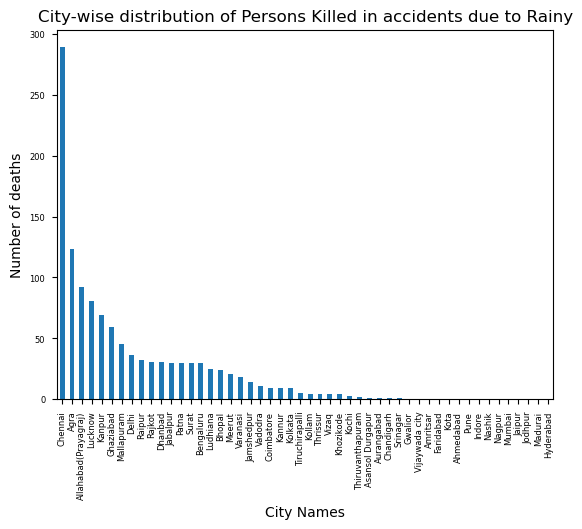

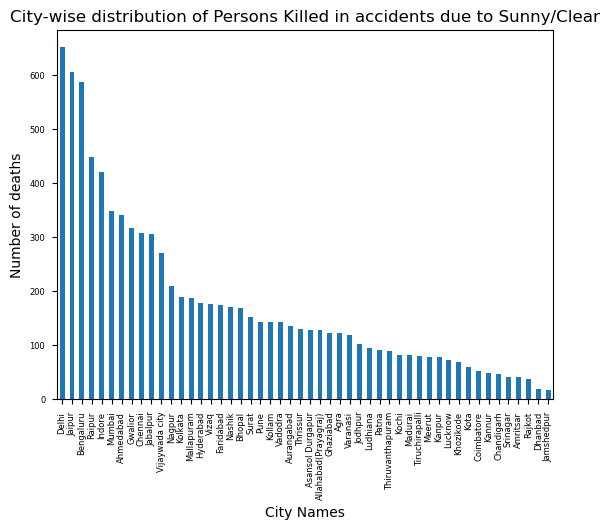

In [36]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for label in killed_subcat_labels:
    
    # Create a mask to filter out the data for each cause subcategory
    label_mask = total_killed_mask[total_killed_mask['cause_subcategory']==label]
    
    subcat_label_mask = total_killed_mask[total_killed_mask['cause_subcategory']==label]
    subcat_killed = subcat_label_mask.groupby(['million_plus_cities']).agg('sum')[['count']].sort_values(by='count', ascending=False)
    
    subcat_killed.plot(kind='bar', title="City-wise distribution of Persons Killed in accidents due to "+ label, legend=False, xlabel="City Names", ylabel="Number of deaths")

    plt.tick_params(pad=5, labelsize=6)
    plt.show()

# Transforming Long data to Wide
We further arrange the dataset in wide format with categories and subcategories as columns for each city. 

In [37]:
# Group by category, sub category and outcome features, then sum their counts
grouped = df.groupby(['million_plus_cities', 'cause_category', 'cause_subcategory', 'outcome_of_incident']).agg('sum')['count'].reset_index()

# Pivot the DataFrame
df_wide = grouped.pivot(index='million_plus_cities', columns=['cause_category', 'cause_subcategory', 'outcome_of_incident'], values='count').reset_index()

#df_wide.columns = df_wide.loc[0:2].fillna("").apply(' : '.join)
df_wide.to_csv("road_accidents_wide.csv", index=False)

In [38]:
df_wide.style.background_gradient()

Now we have a list of 50 cities with their accident statistics data arranged in wide format. It makes the dataset shorter but wider. 

The accident statistics of each city is represented in each row of data. 